<a href="https://colab.research.google.com/github/varunkr24/Machine-Learning/blob/Python/Portfolio_Lock_to_Fund_jan_aug_21_12_3_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import lightgbm as lgb
import pyodbc
import math
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data from model table in SQL Server

sql_conn = pyodbc.connect("DSN=CNPPEDW05")

sql = "select * from Analytics_SB.dbo.DTC_port_Lock_fund_Final_jan_aug_21"

df = pd.read_sql(sql, sql_conn)

df.shape

(38638, 77)

In [ ]:
df.isnull().mean()*100

LoanNumber                                    0.000000
LoanID                                        0.000000
as_of_dt                                      0.100937
as_of_dt_min                                  0.100937
CreatedDt                                     0.000000
AppDt                                         0.033646
InitialLockDt                                 0.000000
STUDt                                        21.370154
DeniedDt                                     89.590559
CancelDt                                     70.793002
FundDt                                       39.937367
CurrentStatus                                 0.000000
CurrentPipelineFlag                           0.000000
LoanAmt                                       0.000000
ProdChannel                                   0.000000
ProductName                                   0.000000
ProductCategory                               0.000000
ProductGroup                                  0.000000
ProductSub

In [ ]:
df.to_csv('Analytics_SB.dbo.DTC_port_Lock_fund_Final_jan_aug_21.csv',index=False)

In [ ]:
df_null = df[df['loan_type'].isnull()]
df_null.shape

(9, 77)

In [ ]:
df_null.head()

,LoanNumber,LoanID,as_of_dt,as_of_dt_min,CreatedDt,AppDt,InitialLockDt,STUDt,DeniedDt,CancelDt,FundDt,CurrentStatus,CurrentPipelineFlag,LoanAmt,ProdChannel,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,CLTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,PurposeType,RefinancePurpose,FTHBFlag,Price,FinalPrice,NewConstructionFlag,BasePrice,EverFundedFlag,BW1MonthlyIncomeBase,BW1TotalMonthlyIncome,BW1IsAVeteran,BCalcLTV,BCalcTotalCredits,BCalcTotalLiabilities,BCalcTotalLoanAmount,BCalcUnderwritingTotalStableMonthlyIncome,BCalcCLTV,BCalcBaseUPBFinalPriceAmount,BCalcTotalStableMonthlyIncomeForBorrower,AttributedCampaign,AttributedCampaignCategory,monthend_as_of_Dt,orig_dt,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,FICO_srv,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,Product_Type_Orig,CurrentPIPmt,OrigPIPmt,borrw_dti_back,doc_type,loan_type,num_of_units,occ_type_orig,srvcr_portf_type,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group
37789,9771015246,3549219,2021-06-24,2021-04-17,2021-04-28,2021-04-28,2021-04-28,2021-05-03,None,2021-05-21,None,Canceled,0,450000.0,Consumer Direct,Conforming Fixed 15,Conventional,Conventional,Conventional Fixed,Conventional,Full,180.0,768.0,56.250,56.250,2.75,46.988,Primary Residence,Detached,1,Refinance,C/O: Debt Consol,False,97.673,-0.448,False,2.327,None,8890.28,8890.28,0,56.250,452039.56,10867.0,450000,8890.28,56.250,2016.0000,8890.28,Broad Market,Unknown Broad Market,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Unattributed,Unattributed
37790,9726992473,3087865,None,None,2020-10-05,2020-10-05,2021-01-12,None,None,2021-01-12,None,Canceled,0,317575.0,Consumer Direct,VA Fixed 30,Government,VA,VA Fixed,VA,Streamline,360.0,NaN,100.008,100.008,2.25,164003.820,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,95.085,1.855,None,4.915,None,0.00,1.00,1,100.008,317575.00,0.0,317575,1.00,100.008,-5891.0162,1.00,Shark Tank Broad Market,Shark Tank Broad Market,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Shark Tank,Monthly Fedex
37791,9709759816,3623272,None,None,2021-06-02,2021-06-07,2021-06-07,2021-06-09,None,None,2021-07-13,Funded,0,548000.0,Consumer Direct,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed,Conventional,Full,360.0,713.0,89.837,89.837,3.45,49.224,Primary Residence,Detached,1,Purchase,None,False,98.947,0.000,False,1.053,True,11113.76,11113.76,0,89.837,564770.00,127097.0,548000,11113.76,89.837,0.0000,11113.76,Caliber COLA Completed,COLA,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Other,Other
37792,9734345177,2500484,None,None,2020-02-03,2021-01-04,2021-01-04,None,None,2021-01-06,None,Canceled,0,293040.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,360.0,NaN,92.904,92.904,2.25,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,False,97.729,-0.039,None,2.271,None,0.00,0.00,0,92.904,293654.29,0.0,293040,0.00,92.904,114.2856,0.00,Unknown Inbound,Other,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Dialer,Dialer
38633,9779815985,2814456,None,None,2020-06-15,2021-04-07,2021-04-07,None,None,2021-04-15,None,Canceled,0,238095.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,360.0,NaN,95.511,95.511,2.75,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.575,-0.435,None,3.425,None,0.00,0.00,0,95.511,239130.71,0.0,238095,0.00,95.511,1035.7132,0.00,JAN 2020 GOV OUTBOUND OVER 4%,Unattributed H2O Loan,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Unknown,Unknown


In [ ]:
#Loading the data from model table in SQL Server

sql_conn = pyodbc.connect("DSN=CNPPEDW05")

sql = "select * from Analytics_SB.dbo.DTC_Pipeline_port_Lock_fund_Final_jan_aug_21"

test = pd.read_sql(sql, sql_conn)

test.shape

(3527, 76)

In [ ]:
test.groupby('InitialLockDt').size()

InitialLockDt
2021-04-08      1
2021-04-09      1
2021-04-22      1
2021-05-07      1
2021-05-19      1
2021-05-25      2
2021-06-22      1
2021-06-23      1
2021-06-30      2
2021-07-01      1
2021-07-07      1
2021-07-12      1
2021-07-13      1
2021-07-14      1
2021-07-16      1
2021-07-19      1
2021-07-20      2
2021-07-21      1
2021-07-23      1
2021-07-27      3
2021-07-28      2
2021-07-29      5
2021-07-30      1
2021-08-02      4
2021-08-03      4
2021-08-04      4
2021-08-05      1
2021-08-06      3
2021-08-09      6
2021-08-11      2
2021-08-12      2
2021-08-13      6
2021-08-16      4
2021-08-17      3
2021-08-18      7
2021-08-19      3
2021-08-20      3
2021-08-23      6
2021-08-24      8
2021-08-25      1
2021-08-26      4
2021-08-27      8
2021-08-28      2
2021-08-30      8
2021-08-31      2
2021-09-01      8
2021-09-02      8
2021-09-03      5
2021-09-07      6
2021-09-08      6
2021-09-09     12
2021-09-10      7
2021-09-13     11
2021-09-14     12
2021-09-15    

In [ ]:
test_null =  test[test['orig_dt'].isnull()]
test_null.shape

(1, 76)

In [ ]:
test_null[['LoanNumber','InitialLockDt']].head()

,LoanNumber,InitialLockDt
3345,9754378132,2021-10-08


In [ ]:
test_null.groupby('InitialLockDt').size()

InitialLockDt
2021-10-08    1
dtype: int64

In [ ]:
test_null['InitialLockDt'].unique()

array([datetime.date(2021, 10, 8)], dtype=object)

In [ ]:
test[test['orig_dt'].isnull()].head()

,LoanNumber,LoanID,as_of_dt,as_of_dt_min,CreatedDt,AppDt,InitialLockDt,STUDt,DeniedDt,CancelDt,FundDt,CurrentStatus,CurrentPipelineFlag,LoanAmt,ProdChannel,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,CLTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,PurposeType,RefinancePurpose,FTHBFlag,Price,FinalPrice,NewConstructionFlag,BasePrice,EverFundedFlag,BW1MonthlyIncomeBase,BW1TotalMonthlyIncome,BW1IsAVeteran,BCalcLTV,BCalcTotalCredits,BCalcTotalLiabilities,BCalcTotalLoanAmount,BCalcUnderwritingTotalStableMonthlyIncome,BCalcCLTV,BCalcBaseUPBFinalPriceAmount,BCalcTotalStableMonthlyIncomeForBorrower,AttributedCampaign,AttributedCampaignCategory,orig_dt,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,FICO_srv,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,Product_Type_Orig,CurrentPIPmt,OrigPIPmt,borrw_dti_back,doc_type,loan_type,num_of_units,occ_type_orig,srvcr_portf_type,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group
3345,9754378132,3869114,2021-10-31,2021-10-04,2021-10-08,2021-10-08,2021-10-08,2021-10-12,None,None,None,Active Pipeline,1,193000.0,Consumer Direct,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed,Conventional,Full,240,726.0,65.424,65.424,2.5,49.314,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,94.438,2.092,False,5.562,None,4333.33,4333.33,1.0,65.424,193548.56,71937.0,193000.0,4333.33,65.424,-4037.56,4333.33,Inbound Servicing Transfer,Servicing Xfer,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN,Servicing Xfer,Servicing


In [ ]:
test.isnull().mean()*100

LoanNumber                                     0.000000
LoanID                                         0.000000
as_of_dt                                       1.757868
as_of_dt_min                                   1.757868
CreatedDt                                      0.000000
AppDt                                          0.000000
InitialLockDt                                  0.000000
STUDt                                         21.859938
DeniedDt                                     100.000000
CancelDt                                     100.000000
FundDt                                       100.000000
CurrentStatus                                  0.000000
CurrentPipelineFlag                            0.000000
LoanAmt                                        0.000000
ProdChannel                                    0.000000
ProductName                                    0.000000
ProductCategory                                0.000000
ProductGroup                                   0

In [ ]:
test.to_csv('Analytics_SB.dbo.DTC_Pipeline_port_Lock_fund_Final_jan_aug_21.csv',index=False)

In [ ]:
df.columns

Index(['LoanNumber', 'LoanID', 'as_of_dt', 'as_of_dt_min', 'CreatedDt',
       'AppDt', 'InitialLockDt', 'STUDt', 'DeniedDt', 'CancelDt', 'FundDt',
       'CurrentStatus', 'CurrentPipelineFlag', 'LoanAmt', 'ProdChannel',
       'ProductName', 'ProductCategory', 'ProductGroup', 'ProductSubGroup',
       'LoanType', 'DocumentType', 'AmortizationTerm', 'FICO', 'LTV', 'CLTV',
       'Rate', 'DTI', 'ResidencyType', 'PropertyType', 'NumberOfUnits',
       'PurposeType', 'RefinancePurpose', 'FTHBFlag', 'Price', 'FinalPrice',
       'NewConstructionFlag', 'BasePrice', 'EverFundedFlag',
       'BW1MonthlyIncomeBase', 'BW1TotalMonthlyIncome', 'BW1IsAVeteran',
       'BCalcLTV', 'BCalcTotalCredits', 'BCalcTotalLiabilities',
       'BCalcTotalLoanAmount', 'BCalcUnderwritingTotalStableMonthlyIncome',
       'BCalcCLTV', 'BCalcBaseUPBFinalPriceAmount',
       'BCalcTotalStableMonthlyIncomeForBorrower', 'AttributedCampaign',
       'AttributedCampaignCategory', 'monthend_as_of_Dt', 'orig_dt',
       

In [ ]:
df.isnull().mean()*100

LoanNumber                                    0.000000
LoanID                                        0.000000
as_of_dt                                      0.100937
as_of_dt_min                                  0.100937
CreatedDt                                     0.000000
AppDt                                         0.033646
InitialLockDt                                 0.000000
STUDt                                        21.370154
DeniedDt                                     89.590559
CancelDt                                     70.793002
FundDt                                       39.937367
CurrentStatus                                 0.000000
CurrentPipelineFlag                           0.000000
LoanAmt                                       0.000000
ProdChannel                                   0.000000
ProductName                                   0.000000
ProductCategory                               0.000000
ProductGroup                                  0.000000
ProductSub

In [ ]:
df['Campaign_Group'].value_counts(normalize=True)*100

Other                      21.631554
LC Call List               18.463689
Benefit                    16.160257
Servicing Xfer             12.203013
Website                     8.087893
Dialer                      6.547958
Unattributed                3.134220
Credit Triggers             2.321549
General Quick Quote         2.078265
Servicing Embedded Team     1.405352
Payoff Triggers             1.149128
Servicing Statement         1.030074
Net Theorem                 1.011957
Ileads Defender             0.615974
Jornaya Activate            0.579740
ILG                         0.494332
Shark Tank                  0.478803
Lending Tree                0.460686
Monthly Benefit DM          0.287282
Suited Connector            0.201874
Acquisition                 0.186345
Real Time Leads             0.126818
Digital Marketing           0.121642
Iconic Results              0.113878
Third Party DM              0.108701
House Canary                0.090584
Adhoc Email                 0.087996
C

In [ ]:
df['Marketing_Group'].value_counts(normalize=True)*100

LC Call List             18.471453
Servicing                14.459858
Other                    13.494487
DM Marketing             12.094311
Email Marketing           9.384544
Website                   8.209535
Dialer                    6.545370
Fedex Marketing           4.997671
Triggers / Signals        4.658626
Unattributed              3.134220
Third Party DM            0.949842
Lead Agg - Real Time      0.675501
ILG                       0.494332
Shark Tank                0.419276
Lead Agg - Warm Xfer      0.339044
Monthly Benefit DM        0.300223
Lead Remarketing          0.266577
Digital                   0.251048
Servicing Xfer            0.238108
Adhoc Email               0.093173
Monthly Benefit Email     0.082820
Monthly Fedex             0.069879
Unknown                   0.062115
3rd Party DM              0.046586
Servicing Statement       0.041410
Lead Agg - Batch Lead     0.033646
BM Signal                 0.033646
Caller ID Callback        0.025881
Quick Quote         

In [ ]:
#Loading the data from model table in SQL Server
#get the prevailing rates
import pyodbc
sql_conn = pyodbc.connect("DSN=CNPPEDW05")

rate_sql = "Select AsOfDtTm,Today From Analytics_rpt.dbo.rpt_Global_MND_Survey r With (NoLock) Where r.Product = '30 Yr FRM'"

rate = pd.read_sql(rate_sql, sql_conn)

rate.shape

(1367, 2)

In [ ]:
rate.head()

,AsOfDtTm,Today
0,2016-06-15 16:05:00,3.56
1,2016-06-16 15:58:00,3.52
2,2016-06-17 15:04:00,3.53
3,2016-06-21 14:02:00,3.57
4,2016-06-22 15:01:00,3.59


In [ ]:
import datetime as dt
rate['AsOfDtTm'] = rate['AsOfDtTm'].dt.date

In [ ]:
df['InitialLockDt'] = pd.to_datetime(df['InitialLockDt']).dt.date
test['InitialLockDt'] = pd.to_datetime(test['InitialLockDt']).dt.date

In [ ]:
rate.columns = ['AsOfDt','Prevailing_rate']

In [ ]:
#have only one prevaling rate for one date
rate=rate.drop_duplicates(subset='AsOfDt',keep='first')

In [ ]:
rate.shape

(1362, 2)

In [ ]:
#when a date is passed, if the date is later than 2016-06-14, get the latest prevailing rate for that date else null
def latest(date):
    if date >= rate['AsOfDt'].min():
        latest_date = rate[rate['AsOfDt']<=date]['AsOfDt'].max()
        return rate.loc[rate['AsOfDt']==latest_date,'Prevailing_rate'].item()
    else:
        return np.nan

In [ ]:
df.head()

,LoanNumber,LoanID,as_of_dt,as_of_dt_min,CreatedDt,AppDt,InitialLockDt,STUDt,DeniedDt,CancelDt,FundDt,CurrentStatus,CurrentPipelineFlag,LoanAmt,ProdChannel,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,CLTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,PurposeType,RefinancePurpose,FTHBFlag,Price,FinalPrice,NewConstructionFlag,BasePrice,EverFundedFlag,BW1MonthlyIncomeBase,BW1TotalMonthlyIncome,BW1IsAVeteran,BCalcLTV,BCalcTotalCredits,BCalcTotalLiabilities,BCalcTotalLoanAmount,BCalcUnderwritingTotalStableMonthlyIncome,BCalcCLTV,BCalcBaseUPBFinalPriceAmount,BCalcTotalStableMonthlyIncomeForBorrower,AttributedCampaign,AttributedCampaignCategory,monthend_as_of_Dt,orig_dt,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,FICO_srv,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,Product_Type_Orig,CurrentPIPmt,OrigPIPmt,borrw_dti_back,doc_type,loan_type,num_of_units,occ_type_orig,srvcr_portf_type,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group
0,9778156191,3693823,2021-10-31,2014-10-07,2021-07-09,2021-07-09,2021-07-09,2021-07-14,2021-07-23,None,None,Denied,0,206043.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Full,360.0,605.0,67.500,67.500,4.05,40.832,Primary Residence,Detached,1,Refinance,C/O: Debt Consol,True,99.100,0.575,False,0.900,None,6250.0,6250.0,0,67.500,206666.56,57280.0,206043,6250.0,67.500,-1184.7472,6250.0,Portfolio Loan,Unknown,2021-06-30,2014-09-10,165938.0,146287.46,0.04750,0.04750,0.9650,0.630138,682.0,232151.30,Unknown,0-29,Fixed,Fixed,865.61,865.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,169000.0,Other,Other
1,9752717661,3721426,2021-10-31,2014-11-17,2021-07-22,2021-07-22,2021-07-22,2021-07-22,2021-08-10,None,None,Denied,0,199000.0,Consumer Direct,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed,Conventional,Full,360.0,790.0,30.616,30.616,2.90,69.234,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.462,0.000,False,3.538,None,0.0,1794.6,0,30.616,199023.56,1426.0,199000,1794.6,30.616,0.0000,1794.6,$$_CreditTrigger_LCList_Port,Credit Trigger,2021-06-30,2014-10-20,240000.0,194752.51,0.04500,0.04500,0.5333,0.322136,803.0,604566.02,Unknown,0-29,Fixed,Fixed,1216.04,1216.04,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,450000.0,Credit Triggers,Triggers / Signals
2,9777231680,3718654,2021-10-31,2016-09-21,2021-07-21,2021-07-21,2021-07-21,2021-07-22,2021-09-29,None,None,Denied,0,126254.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,360.0,NaN,90.572,90.572,2.75,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.960,-0.447,False,3.040,None,NaN,0.0,0,90.572,126818.36,0.0,126254,0.0,90.572,564.3554,0.0,Inbound Servicing Transfer,Servicing Xfer,2021-06-30,2016-08-02,134518.0,123319.63,0.04625,0.04625,0.9650,0.802777,582.0,153616.28,Unknown,0-29,Fixed,Fixed,691.61,691.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,140000.0,Servicing Xfer,Servicing
3,9705101740,3733224,2021-10-31,2015-05-12,2021-07-28,2021-07-28,2021-07-28,2021-08-04,2021-08-31,None,None,Denied,0,87000.0,Consumer Direct,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed,Conventional,Full,240.0,741.0,54.375,54.375,3.25,41.309,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,98.097,0.000,False,1.903,None,0.0,2193.6,0,54.375,87000.00,19345.0,87000,4016.2,54.375,0.0000,2193.6,$$_BenefitMon1_DM_Corr_Port,Monthly Benefit Mktg,2021-06-30,2015-04-17,100000.0,86022.89,0.04375,0.04375,0.6897,0.511981,744.0,168019.76,Unknown,0-29,Fixed,Fixed,499.29,499.29,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,145000.0,Benefit,DM Marketing
4,9772864451,3712211,2021-10-31,2020-08-19,2021-07-19,2021-07-19,2021-07-19,2021-07-19,2021-07-26,None,None,Denied,0,93967.0,Consumer Direct,VA Fixed 30,Government,VA,VA Fixed,VA,Streamline,360.0,NaN,100.972,100.972,2.25,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,95.4

In [ ]:
#map all the asofdts to the latest prevailing rates
asofdts = list(df['InitialLockDt'].unique())
asofdts_1 = list(test['InitialLockDt'].unique())
prevailing_rates = { i : latest(i) for i in asofdts}
prevailing_rates_1 = { i : latest(i) for i in asofdts_1}
prevailing_rates

{datetime.date(2021, 7, 9): 3.04,
 datetime.date(2021, 7, 22): 2.88,
 datetime.date(2021, 7, 21): 2.9,
 datetime.date(2021, 7, 28): 2.87,
 datetime.date(2021, 7, 19): 2.89,
 datetime.date(2021, 7, 26): 2.86,
 datetime.date(2021, 7, 6): 3.13,
 datetime.date(2021, 7, 13): 3.11,
 datetime.date(2021, 7, 20): 2.87,
 datetime.date(2021, 7, 2): 3.16,
 datetime.date(2021, 7, 30): 2.84,
 datetime.date(2021, 7, 1): 3.18,
 datetime.date(2021, 7, 27): 2.86,
 datetime.date(2021, 7, 29): 2.86,
 datetime.date(2021, 7, 7): 3.07,
 datetime.date(2021, 7, 15): 3.04,
 datetime.date(2021, 7, 14): 3.09,
 datetime.date(2021, 7, 8): 3.03,
 datetime.date(2021, 7, 24): 2.87,
 datetime.date(2021, 7, 16): 2.97,
 datetime.date(2021, 7, 23): 2.87,
 datetime.date(2021, 1, 21): 2.84,
 datetime.date(2021, 1, 22): 2.8,
 datetime.date(2021, 1, 29): 2.8,
 datetime.date(2021, 1, 6): 2.85,
 datetime.date(2021, 1, 7): 2.86,
 datetime.date(2021, 1, 19): 2.87,
 datetime.date(2021, 1, 20): 2.85,
 datetime.date(2021, 1, 30): 2.

In [ ]:
#get the latest prevailing rate for asofdt
df['prevailing_rate_present'] = df['InitialLockDt'].map(prevailing_rates)
test['prevailing_rate_present'] = test['InitialLockDt'].map(prevailing_rates_1)

In [ ]:
df.head()

,LoanNumber,LoanID,as_of_dt,as_of_dt_min,CreatedDt,AppDt,InitialLockDt,STUDt,DeniedDt,CancelDt,FundDt,CurrentStatus,CurrentPipelineFlag,LoanAmt,ProdChannel,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,CLTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,PurposeType,RefinancePurpose,FTHBFlag,Price,FinalPrice,NewConstructionFlag,BasePrice,EverFundedFlag,BW1MonthlyIncomeBase,BW1TotalMonthlyIncome,BW1IsAVeteran,BCalcLTV,BCalcTotalCredits,BCalcTotalLiabilities,BCalcTotalLoanAmount,BCalcUnderwritingTotalStableMonthlyIncome,BCalcCLTV,BCalcBaseUPBFinalPriceAmount,BCalcTotalStableMonthlyIncomeForBorrower,AttributedCampaign,AttributedCampaignCategory,monthend_as_of_Dt,orig_dt,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,FICO_srv,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,Product_Type_Orig,CurrentPIPmt,OrigPIPmt,borrw_dti_back,doc_type,loan_type,num_of_units,occ_type_orig,srvcr_portf_type,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,prevailing_rate_present
0,9778156191,3693823,2021-10-31,2014-10-07,2021-07-09,2021-07-09,2021-07-09,2021-07-14,2021-07-23,None,None,Denied,0,206043.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Full,360.0,605.0,67.500,67.500,4.05,40.832,Primary Residence,Detached,1,Refinance,C/O: Debt Consol,True,99.100,0.575,False,0.900,None,6250.0,6250.0,0,67.500,206666.56,57280.0,206043,6250.0,67.500,-1184.7472,6250.0,Portfolio Loan,Unknown,2021-06-30,2014-09-10,165938.0,146287.46,0.04750,0.04750,0.9650,0.630138,682.0,232151.30,Unknown,0-29,Fixed,Fixed,865.61,865.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,169000.0,Other,Other,3.04
1,9752717661,3721426,2021-10-31,2014-11-17,2021-07-22,2021-07-22,2021-07-22,2021-07-22,2021-08-10,None,None,Denied,0,199000.0,Consumer Direct,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed,Conventional,Full,360.0,790.0,30.616,30.616,2.90,69.234,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.462,0.000,False,3.538,None,0.0,1794.6,0,30.616,199023.56,1426.0,199000,1794.6,30.616,0.0000,1794.6,$$_CreditTrigger_LCList_Port,Credit Trigger,2021-06-30,2014-10-20,240000.0,194752.51,0.04500,0.04500,0.5333,0.322136,803.0,604566.02,Unknown,0-29,Fixed,Fixed,1216.04,1216.04,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,450000.0,Credit Triggers,Triggers / Signals,2.88
2,9777231680,3718654,2021-10-31,2016-09-21,2021-07-21,2021-07-21,2021-07-21,2021-07-22,2021-09-29,None,None,Denied,0,126254.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,360.0,NaN,90.572,90.572,2.75,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.960,-0.447,False,3.040,None,NaN,0.0,0,90.572,126818.36,0.0,126254,0.0,90.572,564.3554,0.0,Inbound Servicing Transfer,Servicing Xfer,2021-06-30,2016-08-02,134518.0,123319.63,0.04625,0.04625,0.9650,0.802777,582.0,153616.28,Unknown,0-29,Fixed,Fixed,691.61,691.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,140000.0,Servicing Xfer,Servicing,2.90
3,9705101740,3733224,2021-10-31,2015-05-12,2021-07-28,2021-07-28,2021-07-28,2021-08-04,2021-08-31,None,None,Denied,0,87000.0,Consumer Direct,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed,Conventional,Full,240.0,741.0,54.375,54.375,3.25,41.309,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,98.097,0.000,False,1.903,None,0.0,2193.6,0,54.375,87000.00,19345.0,87000,4016.2,54.375,0.0000,2193.6,$$_BenefitMon1_DM_Corr_Port,Monthly Benefit Mktg,2021-06-30,2015-04-17,100000.0,86022.89,0.04375,0.04375,0.6897,0.511981,744.0,168019.76,Unknown,0-29,Fixed,Fixed,499.29,499.29,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,145000.0,Benefit,DM Marketing,2.87
4,9772864451,3712211,2021-10-31,2020-08-19,2021-07-19,2021-07-19,2021-07-19,2021-07-19,2021-07-26,None,None,Denied,0,93967.0,Consumer Direct,VA Fixed 30,Government,VA,VA Fixed,VA,Streamline,360.0,NaN,100.972,100.972,2.25,0.000,Primary Residence,Deta

In [ ]:
df['prevailing_rate_present'].isnull().sum()

0

In [ ]:
df['orig_dt'] = pd.to_datetime(df['orig_dt']).dt.date
test['orig_dt'] = pd.to_datetime(test['orig_dt']).dt.date

In [ ]:
#get the orig dates mapped to their latest prevailing rates
origdts = list(df['orig_dt'].unique())
origdts_1 = list(test['orig_dt'].unique())
prevailing_rates_orig = { i : latest(i) for i in origdts}
prevailing_rates_orig_1 = { i : latest(i) for i in origdts_1}

In [ ]:
df['prevailing_rate_past'] = df['orig_dt'].map(prevailing_rates_orig)
test['prevailing_rate_past'] = test['orig_dt'].map(prevailing_rates_orig_1)

In [ ]:
df['prevailing_rate_past'].isnull().sum()

5925

In [ ]:
df['int_rate_curr'] = df['int_rate_curr']*100
df['int_rate_orig'] = df['int_rate_orig']*100
test['int_rate_curr'] = test['int_rate_curr']*100
test['int_rate_orig'] = test['int_rate_orig']*100

In [ ]:
#the null values (orig_dt < 2016-06-14) are replaced with the currrate
df.loc[df['prevailing_rate_past'].isnull(),'prevailing_rate_past'] = df.loc[df['prevailing_rate_past'].isnull(),'int_rate_curr']#the null values (orig_dt < 2016-06-14) are replaced with the currrate
test.loc[test['prevailing_rate_past'].isnull(),'prevailing_rate_past'] = test.loc[test['prevailing_rate_past'].isnull(),'int_rate_curr']

In [ ]:
df['prevailing_rate_past'].isnull().sum()

9

In [ ]:
test['prevailing_rate_past'].isnull().sum()

1

In [ ]:
#df = pd.read_csv('portfolio_lock_fund_final_09_09.csv')
df.shape

(38638, 79)

In [ ]:
df.isnull().sum()

LoanNumber                                       0
LoanID                                           0
as_of_dt                                        39
as_of_dt_min                                    39
CreatedDt                                        0
AppDt                                           13
InitialLockDt                                    0
STUDt                                         8257
DeniedDt                                     34616
CancelDt                                     27353
FundDt                                       15431
CurrentStatus                                    0
CurrentPipelineFlag                              0
LoanAmt                                          0
ProdChannel                                      0
ProductName                                      0
ProductCategory                                  0
ProductGroup                                     0
ProductSubGroup                                  0
LoanType                       

In [ ]:
df.isnull().mean()*100

LoanNumber                                    0.000000
LoanID                                        0.000000
as_of_dt                                      0.100937
as_of_dt_min                                  0.100937
CreatedDt                                     0.000000
AppDt                                         0.033646
InitialLockDt                                 0.000000
STUDt                                        21.370154
DeniedDt                                     89.590559
CancelDt                                     70.793002
FundDt                                       39.937367
CurrentStatus                                 0.000000
CurrentPipelineFlag                           0.000000
LoanAmt                                       0.000000
ProdChannel                                   0.000000
ProductName                                   0.000000
ProductCategory                               0.000000
ProductGroup                                  0.000000
ProductSub

In [ ]:
df.head()

,LoanNumber,LoanID,as_of_dt,as_of_dt_min,CreatedDt,AppDt,InitialLockDt,STUDt,DeniedDt,CancelDt,FundDt,CurrentStatus,CurrentPipelineFlag,LoanAmt,ProdChannel,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,CLTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,PurposeType,RefinancePurpose,FTHBFlag,Price,FinalPrice,NewConstructionFlag,BasePrice,EverFundedFlag,BW1MonthlyIncomeBase,BW1TotalMonthlyIncome,BW1IsAVeteran,BCalcLTV,BCalcTotalCredits,BCalcTotalLiabilities,BCalcTotalLoanAmount,BCalcUnderwritingTotalStableMonthlyIncome,BCalcCLTV,BCalcBaseUPBFinalPriceAmount,BCalcTotalStableMonthlyIncomeForBorrower,AttributedCampaign,AttributedCampaignCategory,monthend_as_of_Dt,orig_dt,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,FICO_srv,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,Product_Type_Orig,CurrentPIPmt,OrigPIPmt,borrw_dti_back,doc_type,loan_type,num_of_units,occ_type_orig,srvcr_portf_type,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,prevailing_rate_present,prevailing_rate_past
0,9778156191,3693823,2021-10-31,2014-10-07,2021-07-09,2021-07-09,2021-07-09,2021-07-14,2021-07-23,None,None,Denied,0,206043.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Full,360.0,605.0,67.500,67.500,4.05,40.832,Primary Residence,Detached,1,Refinance,C/O: Debt Consol,True,99.100,0.575,False,0.900,None,6250.0,6250.0,0,67.500,206666.56,57280.0,206043,6250.0,67.500,-1184.7472,6250.0,Portfolio Loan,Unknown,2021-06-30,2014-09-10,165938.0,146287.46,4.750,4.750,0.9650,0.630138,682.0,232151.30,Unknown,0-29,Fixed,Fixed,865.61,865.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,169000.0,Other,Other,3.04,4.750
1,9752717661,3721426,2021-10-31,2014-11-17,2021-07-22,2021-07-22,2021-07-22,2021-07-22,2021-08-10,None,None,Denied,0,199000.0,Consumer Direct,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed,Conventional,Full,360.0,790.0,30.616,30.616,2.90,69.234,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.462,0.000,False,3.538,None,0.0,1794.6,0,30.616,199023.56,1426.0,199000,1794.6,30.616,0.0000,1794.6,$$_CreditTrigger_LCList_Port,Credit Trigger,2021-06-30,2014-10-20,240000.0,194752.51,4.500,4.500,0.5333,0.322136,803.0,604566.02,Unknown,0-29,Fixed,Fixed,1216.04,1216.04,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,450000.0,Credit Triggers,Triggers / Signals,2.88,4.500
2,9777231680,3718654,2021-10-31,2016-09-21,2021-07-21,2021-07-21,2021-07-21,2021-07-22,2021-09-29,None,None,Denied,0,126254.0,Consumer Direct,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,360.0,NaN,90.572,90.572,2.75,0.000,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,96.960,-0.447,False,3.040,None,NaN,0.0,0,90.572,126818.36,0.0,126254,0.0,90.572,564.3554,0.0,Inbound Servicing Transfer,Servicing Xfer,2021-06-30,2016-08-02,134518.0,123319.63,4.625,4.625,0.9650,0.802777,582.0,153616.28,Unknown,0-29,Fixed,Fixed,691.61,691.61,0.0,Full Doc,FHA,1.0,Owner Occupied,HOME LENDING,360.0,140000.0,Servicing Xfer,Servicing,2.90,3.390
3,9705101740,3733224,2021-10-31,2015-05-12,2021-07-28,2021-07-28,2021-07-28,2021-08-04,2021-08-31,None,None,Denied,0,87000.0,Consumer Direct,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed,Conventional,Full,240.0,741.0,54.375,54.375,3.25,41.309,Primary Residence,Detached,1,Refinance,No C/O: Rate/Term,True,98.097,0.000,False,1.903,None,0.0,2193.6,0,54.375,87000.00,19345.0,87000,4016.2,54.375,0.0000,2193.6,$$_BenefitMon1_DM_Corr_Port,Monthly Benefit Mktg,2021-06-30,2015-04-17,100000.0,86022.89,4.375,4.375,0.6897,0.511981,744.0,168019.76,Unknown,0-29,Fixed,Fixed,499.29,499.29,0.0,Full Doc,Conv,1.0,Owner Occupied,HOME LENDING,360.0,145000.0,Benefit,DM Marketing,2.87,4.375
4,9772864451,3712211,2021-10-31,2020-08-19,2021-07-19,2021-07-19,2021-07-19,2021-07-19,2021-07-26,None,None,Denied,0,93967.0,Consumer Direct,VA Fixed 30,Government,VA,VA Fixed,VA,Streamline,360.0,NaN,100.972,100.972,2.25

In [ ]:
df['CurrentStatus'].value_counts()

Funded             23207
Canceled           11285
Denied              4022
Active Pipeline      124
Name: CurrentStatus, dtype: int64

In [ ]:
df[~(df['CurrentStatus'].isin(['Active Pipeline','Pre-App Pipeline']))].shape

(38514, 79)

In [ ]:
# Removing the loans which are pre-app pipeline or active pipeline as we don't know the exact output of these loans (funded or not)
df = df[~(df['CurrentStatus'].isin(['Active Pipeline','Pre-App Pipeline']))]
df.shape

(38514, 79)

This is the data that should be taken.

In [ ]:
df.isnull().mean()*100

LoanNumber                                    0.000000
LoanID                                        0.000000
as_of_dt                                      0.101262
as_of_dt_min                                  0.101262
CreatedDt                                     0.000000
AppDt                                         0.033754
InitialLockDt                                 0.000000
STUDt                                        21.438957
DeniedDt                                     89.557044
CancelDt                                     70.698967
FundDt                                       39.743989
CurrentStatus                                 0.000000
CurrentPipelineFlag                           0.000000
LoanAmt                                       0.000000
ProdChannel                                   0.000000
ProductName                                   0.000000
ProductCategory                               0.000000
ProductGroup                                  0.000000
ProductSub

In [ ]:
df['Fund'] = np.where(df['FundDt'].isnull(), 0, 1)
df['FTHBFlag'] = np.where(df['FTHBFlag'] == True, 'TRUE', 'FALSE')
test['FTHBFlag'] = np.where(test['FTHBFlag'] == True, 'TRUE', 'FALSE')

In [ ]:
# (4.19%) Loans which doesn't have servicing information have 2.9% of the total funded loans. 
(sum(df.loc[df['bal_prin'].isnull(),'Fund'])/ sum(df['Fund']))*100

0.008618089369586763

In [ ]:
df.shape

(38514, 80)

In [ ]:
# Removing the loans where we don't have servicing information to keep the data consistent
df[df['bal_prin'].isnull()].shape

(9, 80)

In [ ]:
test[test['bal_prin'].isnull()].shape

(1, 78)

In [ ]:
df = df[~df['as_of_dt'].isnull()]
df = df[~df['bal_orig'].isnull()]
df.shape

(38472, 80)

In [ ]:
df.isnull().sum()

LoanNumber                                       0
LoanID                                           0
as_of_dt                                         0
as_of_dt_min                                     0
CreatedDt                                        0
AppDt                                           13
InitialLockDt                                    0
STUDt                                         8247
DeniedDt                                     34452
CancelDt                                     27198
FundDt                                       15294
CurrentStatus                                    0
CurrentPipelineFlag                              0
LoanAmt                                          0
ProdChannel                                      0
ProductName                                      0
ProductCategory                                  0
ProductGroup                                     0
ProductSubGroup                                  0
LoanType                       

In [ ]:
df['RefinancePurpose'].value_counts()

No C/O: Rate/Term    31235
C/O: Debt Consol      6480
C/O: Other             319
Limited C/O            266
C/O: Home Imp           82
Name: RefinancePurpose, dtype: int64

In [ ]:
df['PurposeType'].value_counts(normalize=True)

Refinance    0.997687
Purchase     0.002313
Name: PurposeType, dtype: float64

In [ ]:
df['borrw_dti_back'].value_counts(normalize=True)

0.0000    0.998674
0.2961    0.000078
0.4370    0.000078
0.4027    0.000052
0.4484    0.000052
0.2739    0.000052
0.1976    0.000026
0.4958    0.000026
0.3645    0.000026
0.3391    0.000026
0.3477    0.000026
0.3934    0.000026
0.3560    0.000026
0.3780    0.000026
0.3205    0.000026
0.3508    0.000026
0.3791    0.000026
0.4499    0.000026
0.4932    0.000026
0.2192    0.000026
0.4121    0.000026
0.3978    0.000026
0.3841    0.000026
0.4409    0.000026
0.3606    0.000026
0.2800    0.000026
0.4725    0.000026
0.4834    0.000026
0.4426    0.000026
0.5198    0.000026
0.3486    0.000026
0.3688    0.000026
0.4216    0.000026
0.3913    0.000026
0.4500    0.000026
0.4134    0.000026
0.3042    0.000026
0.3912    0.000026
0.4005    0.000026
0.3354    0.000026
0.4642    0.000026
0.3481    0.000026
0.2540    0.000026
0.3806    0.000026
0.2874    0.000026
Name: borrw_dti_back, dtype: float64

In [ ]:
stu_df = df[['LoanNumber','STUDt']]

In [ ]:
not_req_cols = ['CreatedDt'
                ,'LoanID'
                ,'as_of_dt'
                ,'as_of_dt_min'
                ,'AppDt'    # Removing all the stage variables such as STUDt, CurrentPipelineFlag, DeniedDt, CancelDt which are not required for modeling.
                ,'STUDt'
                ,'DeniedDt'
                ,'CancelDt'
                ,'CurrentPipelineFlag'
                ,'FundDt'
                ,'BasePrice'
                ,'Price'
                ,'EverFundedFlag' # Similar to Fund (target column) and creates target leakage
                ,'BW1MonthlyIncomeBase' # we have the total monthly income variable and this variable has lot of missing values.
                ,'ProdChannel' # Removing this variable as it contains only one value which is consumer direct
                ,'num_of_units' # we have similar variable called 'NumberOfUnits'
                ,'BCalcLTV' # we have LTV and CLTV from atlas table
                ,'BCalcCLTV'
                ,'CLTV'  # Combined loan to value (CLTV) 99.26% same as LTV   
                ,'OrigPIPmt'
                ,'Product_Type_Orig'
                ,'BW1TotalMonthlyIncome' # Removing these monthly income columns as we have BCalcUnderwritingTotalStableMonthlyIncome which is important
                ,'BCalcTotalStableMonthlyIncomeForBorrower'
                ,'CurrentStatus' # we can remove this as we cannot have this variable during predicting on the test data
                ,'srvcr_portf_type' # It has only single value which we don't require for modeling
                ,'FICO_srv'
                ,'PurposeType' # 99.99% is made of refinance
                ,'borrw_dti_back' # No variance
#                 ,'loan_type' # we have another LoanType variable which we are using for modeling
               ] 

In [ ]:
df = df.drop(not_req_cols, axis=1)
test = test.drop(not_req_cols, axis=1)
df.isnull().mean()*100

LoanNumber                                    0.000000
InitialLockDt                                 0.000000
LoanAmt                                       0.000000
ProductName                                   0.000000
ProductCategory                               0.000000
ProductGroup                                  0.000000
ProductSubGroup                               0.000000
LoanType                                      0.000000
DocumentType                                  0.000000
AmortizationTerm                              0.002599
FICO                                         45.269287
LTV                                           0.000000
Rate                                          0.000000
DTI                                           0.000000
ResidencyType                                 0.000000
PropertyType                                  0.000000
NumberOfUnits                                 0.000000
RefinancePurpose                              0.233936
FTHBFlag  

In [ ]:
print(df.shape)
print(test.shape)

(38472, 52)
(3527, 50)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38472 entries, 0 to 38632
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LoanNumber                                 38472 non-null  object 
 1   InitialLockDt                              38472 non-null  object 
 2   LoanAmt                                    38472 non-null  float64
 3   ProductName                                38472 non-null  object 
 4   ProductCategory                            38472 non-null  object 
 5   ProductGroup                               38472 non-null  object 
 6   ProductSubGroup                            38472 non-null  object 
 7   LoanType                                   38472 non-null  object 
 8   DocumentType                               38472 non-null  object 
 9   AmortizationTerm                           38471 non-null  float64
 10  FICO                  

In [ ]:
df['Fund'].value_counts(normalize=True)*100

1    60.246413
0    39.753587
Name: Fund, dtype: float64

### get datatypes

In [ ]:
def type_columns(df,type_req):
    type_req_cols = df.select_dtypes(include =[type_req]).columns
    return(type_req_cols.to_list())

In [ ]:
int_cols = type_columns(df,'int64')
int_cols

['NumberOfUnits', 'BW1IsAVeteran', 'BCalcTotalLoanAmount', 'Fund']

In [ ]:
float_cols = type_columns(df, 'float64')
float_cols

['LoanAmt',
 'AmortizationTerm',
 'FICO',
 'LTV',
 'Rate',
 'DTI',
 'FinalPrice',
 'BCalcTotalCredits',
 'BCalcTotalLiabilities',
 'BCalcUnderwritingTotalStableMonthlyIncome',
 'BCalcBaseUPBFinalPriceAmount',
 'bal_orig',
 'bal_prin',
 'int_rate_orig',
 'int_rate_curr',
 'ltv_orig',
 'ltv_curr',
 'Val_waterfall',
 'CurrentPIPmt',
 'term_orig',
 'val_appraisal_orig',
 'prevailing_rate_present',
 'prevailing_rate_past']

In [ ]:
object_cols = type_columns(df, 'object')
object_cols

['LoanNumber',
 'InitialLockDt',
 'ProductName',
 'ProductCategory',
 'ProductGroup',
 'ProductSubGroup',
 'LoanType',
 'DocumentType',
 'ResidencyType',
 'PropertyType',
 'RefinancePurpose',
 'FTHBFlag',
 'NewConstructionFlag',
 'AttributedCampaign',
 'AttributedCampaignCategory',
 'monthend_as_of_Dt',
 'orig_dt',
 'loan_purpose',
 'delq_status_mba',
 'product_type_curr',
 'doc_type',
 'loan_type',
 'occ_type_orig',
 'Campaign_Group',
 'Marketing_Group']

In [ ]:
len(int_cols) + len(float_cols) + len(object_cols)

52

In [ ]:
df.shape

(38472, 52)

In [ ]:
df[int_cols].head()

,NumberOfUnits,BW1IsAVeteran,BCalcTotalLoanAmount,Fund
0,1,0,206043,0
1,1,0,199000,0
2,1,0,126254,0
3,1,0,87000,0
4,1,1,93967,0


In [ ]:
df['BW1IsAVeteran'] =  np.where(df['BW1IsAVeteran'] == 1, 'TRUE', 'FALSE')
test['BW1IsAVeteran'] =  np.where(test['BW1IsAVeteran'] == 1, 'TRUE', 'FALSE')
int_cols.remove('BW1IsAVeteran')
object_cols.append('BW1IsAVeteran')

In [ ]:
df[int_cols].head()

,NumberOfUnits,BCalcTotalLoanAmount,Fund
0,1,206043,0
1,1,199000,0
2,1,126254,0
3,1,87000,0
4,1,93967,0


In [ ]:
df['AmortizationTerm'].value_counts()

360.0    30248
180.0     3588
240.0     1549
300.0     1049
120.0      568
336.0      541
324.0      220
348.0      210
312.0      121
264.0       72
144.0       48
156.0       46
288.0       42
276.0       39
96.0        25
168.0       25
252.0       24
132.0       19
228.0       11
216.0       10
204.0        8
108.0        4
192.0        3
338.0        1
Name: AmortizationTerm, dtype: int64

In [ ]:
df[float_cols].head()

,LoanAmt,AmortizationTerm,FICO,LTV,Rate,DTI,FinalPrice,BCalcTotalCredits,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,CurrentPIPmt,term_orig,val_appraisal_orig,prevailing_rate_present,prevailing_rate_past
0,206043.0,360.0,605.0,67.500,4.05,40.832,0.575,206666.56,57280.0,6250.0,-1184.7472,165938.0,146287.46,4.750,4.750,0.9650,0.630138,232151.30,865.61,360.0,169000.0,3.04,4.750
1,199000.0,360.0,790.0,30.616,2.90,69.234,0.000,199023.56,1426.0,1794.6,0.0000,240000.0,194752.51,4.500,4.500,0.5333,0.322136,604566.02,1216.04,360.0,450000.0,2.88,4.500
2,126254.0,360.0,NaN,90.572,2.75,0.000,-0.447,126818.36,0.0,0.0,564.3554,134518.0,123319.63,4.625,4.625,0.9650,0.802777,153616.28,691.61,360.0,140000.0,2.90,3.390
3,87000.0,240.0,741.0,54.375,3.25,41.309,0.000,87000.00,19345.0,4016.2,0.0000,100000.0,86022.89,4.375,4.375,0.6897,0.511981,168019.76,499.29,360.0,145000.0,2.87,4.375
4,93967.0,360.0,NaN,100.972,2.25,0.000,2.989,93967.00,0.0,0.0,-2808.6736,92600.0,90924.59,2.750,2.750,1.0250,1.011487,89892.00,378.03,360.0,89892.0,2.89,2.820


In [ ]:
df['ltv_curr'] = df['ltv_curr'] *100
df['ltv_orig'] = df['ltv_orig']*100
test['ltv_curr'] = test['ltv_curr'] *100
test['ltv_orig'] = test['ltv_orig']*100
df[['LTV','ltv_orig','ltv_curr']].head()

,LTV,ltv_orig,ltv_curr
0,67.500,96.50,63.013845
1,30.616,53.33,32.213605
2,90.572,96.50,80.277709
3,54.375,68.97,51.198079
4,100.972,102.50,101.148701


In [ ]:
df[float_cols].nunique()

LoanAmt                                      23763
AmortizationTerm                                24
FICO                                           320
LTV                                          22562
Rate                                            66
DTI                                          16829
FinalPrice                                    6436
BCalcTotalCredits                            32321
BCalcTotalLiabilities                        17681
BCalcUnderwritingTotalStableMonthlyIncome    17025
BCalcBaseUPBFinalPriceAmount                 33440
bal_orig                                     17719
bal_prin                                     38033
int_rate_orig                                  676
int_rate_curr                                  659
ltv_orig                                      5882
ltv_curr                                     38157
Val_waterfall                                33002
CurrentPIPmt                                 29015
term_orig                      

In [ ]:
df[object_cols].head()

,LoanNumber,InitialLockDt,ProductName,ProductCategory,ProductGroup,ProductSubGroup,LoanType,DocumentType,ResidencyType,PropertyType,RefinancePurpose,FTHBFlag,NewConstructionFlag,AttributedCampaign,AttributedCampaignCategory,monthend_as_of_Dt,orig_dt,loan_purpose,delq_status_mba,product_type_curr,doc_type,loan_type,occ_type_orig,Campaign_Group,Marketing_Group,BW1IsAVeteran
0,9778156191,2021-07-09,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Full,Primary Residence,Detached,C/O: Debt Consol,TRUE,False,Portfolio Loan,Unknown,2021-06-30,2014-09-10,Unknown,0-29,Fixed,Full Doc,FHA,Owner Occupied,Other,Other,FALSE
1,9752717661,2021-07-22,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed,Conventional,Full,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,$$_CreditTrigger_LCList_Port,Credit Trigger,2021-06-30,2014-10-20,Unknown,0-29,Fixed,Full Doc,Conv,Owner Occupied,Credit Triggers,Triggers / Signals,FALSE
2,9777231680,2021-07-21,FHA Fixed 30,Government,FHA,FHA Fixed,FHA,Streamline,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Inbound Servicing Transfer,Servicing Xfer,2021-06-30,2016-08-02,Unknown,0-29,Fixed,Full Doc,FHA,Owner Occupied,Servicing Xfer,Servicing,FALSE
3,9705101740,2021-07-28,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed,Conventional,Full,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,$$_BenefitMon1_DM_Corr_Port,Monthly Benefit Mktg,2021-06-30,2015-04-17,Unknown,0-29,Fixed,Full Doc,Conv,Owner Occupied,Benefit,DM Marketing,FALSE
4,9772864451,2021-07-19,VA Fixed 30,Government,VA,VA Fixed,VA,Streamline,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Inbound Servicing Transfer,Servicing Xfer,2021-06-30,2020-08-10,Refi Rate Term,0-29,Fixed,Streamlined,VA,Owner Occupied,Servicing Xfer,Servicing,TRUE


In [ ]:
df[object_cols].nunique()

LoanNumber                    38472
InitialLockDt                   201
ProductName                      33
ProductCategory                   3
ProductGroup                      6
ProductSubGroup                   8
LoanType                          3
DocumentType                      2
ResidencyType                     3
PropertyType                      6
RefinancePurpose                  5
FTHBFlag                          2
NewConstructionFlag               2
AttributedCampaign              765
AttributedCampaignCategory       76
monthend_as_of_Dt                 8
orig_dt                        3042
loan_purpose                      6
delq_status_mba                   8
product_type_curr                 2
doc_type                          5
loan_type                         5
occ_type_orig                     6
Campaign_Group                   55
Marketing_Group                  37
BW1IsAVeteran                     2
dtype: int64

### EDA object cols

In [ ]:
df[['ProductName','ProductCategory','ProductGroup','ProductSubGroup']].drop_duplicates().reset_index()

,index,ProductName,ProductCategory,ProductGroup,ProductSubGroup
0,0,FHA Fixed 30,Government,FHA,FHA Fixed
1,1,Conforming Fixed 30,Conventional,Conventional,Conventional Fixed
2,3,Conforming Fixed 20,Conventional,Conventional,Conventional Fixed
3,4,VA Fixed 30,Government,VA,VA Fixed
4,12,Conforming Fixed 15,Conventional,Conventional,Conventional Fixed
5,18,Conforming Texas A6 Fixed 30,Conventional,Conventional,Conventional Fixed
6,20,Caliber Sprint Fixed 30,Conventional,Conventional,Conventional Fixed
7,31,Conforming Fixed 10,Conventional,Conventional,Conventional Fixed
8,41,Conforming High Balance Fixed 30,Conventional,Conventional,Conventional Fixed High Balance
9,55,VA High Balance Fixed 30,Government,VA,VA Fixed High Balance


In [ ]:
df[['ProductName','ProductCategory','ProductGroup','ProductSubGroup']].nunique()

ProductName        33
ProductCategory     3
ProductGroup        6
ProductSubGroup     8
dtype: int64

In [ ]:
#### We can just keep product group and remove the others
df.drop(['ProductName','ProductCategory','ProductSubGroup'],axis=1,inplace = True)
test.drop(['ProductName','ProductCategory','ProductSubGroup'],axis=1,inplace = True)
object_cols = [x for x in object_cols if x not in ['ProductName','ProductCategory','ProductSubGroup']]

In [ ]:
df[['AttributedCampaign','AttributedCampaignCategory']].drop_duplicates().reset_index()

,index,AttributedCampaign,AttributedCampaignCategory
0,0,Portfolio Loan,Unknown
1,1,$$_CreditTrigger_LCList_Port,Credit Trigger
2,2,Inbound Servicing Transfer,Servicing Xfer
3,3,$$_BenefitMon1_DM_Corr_Port,Monthly Benefit Mktg
4,5,Digital ReMarketing Campaign,Website
5,6,$$_Jun21_Conv_LCCallList,LC Call List
6,7,$$_May21_VA_LCCallList,LC Call List
7,8,$$_Jul21_VAIRRRL2_LCCallList,LC Call List
8,9,$$_Apr21_VA_3.25_LCCallList,LC Call List
9,10,$$_Jul21_FHA_LCCallList,LC Call List


In [ ]:
df[['AttributedCampaign','AttributedCampaignCategory']].nunique()

AttributedCampaign            765
AttributedCampaignCategory     76
dtype: int64

In [ ]:
df.drop('AttributedCampaign',axis=1,inplace=True)
test.drop('AttributedCampaign',axis=1,inplace=True)
object_cols.remove('AttributedCampaign')

In [ ]:
def year_fun(x):
    if np.floor(x/365)< 1:
        return '< 1'
    elif np.floor(x/365) < 3:
        return '1-3 yrs'
    elif np.floor(x/365) < 6:
        return '3-5 yrs'
    else:
        return '5+'

In [ ]:
df['orig_dt'] = pd.to_datetime(df['orig_dt'])
df['InitialLockDt'] = pd.to_datetime(df['InitialLockDt'])
df['orig_years'] = ((df['InitialLockDt']-df['orig_dt']).dt.days).apply(year_fun)
test['orig_dt'] = pd.to_datetime(test['orig_dt'])
test['InitialLockDt'] = pd.to_datetime(test['InitialLockDt'])
test['orig_years'] = ((test['InitialLockDt']-test['orig_dt']).dt.days).apply(year_fun)
df[['orig_years','InitialLockDt','orig_dt']].head()

,orig_years,InitialLockDt,orig_dt
0,5+,2021-07-09,2014-09-10
1,5+,2021-07-22,2014-10-20
2,3-5 yrs,2021-07-21,2016-08-02
3,5+,2021-07-28,2015-04-17
4,< 1,2021-07-19,2020-08-10


In [ ]:
df.drop(['InitialLockDt','orig_dt'],axis=1,inplace=True)
test.drop(['InitialLockDt','orig_dt'],axis=1,inplace=True)
object_cols.remove('InitialLockDt')
object_cols.remove('orig_dt')
object_cols.append('orig_years')

In [ ]:
df[object_cols].head()

,LoanNumber,ProductGroup,LoanType,DocumentType,ResidencyType,PropertyType,RefinancePurpose,FTHBFlag,NewConstructionFlag,AttributedCampaignCategory,monthend_as_of_Dt,loan_purpose,delq_status_mba,product_type_curr,doc_type,loan_type,occ_type_orig,Campaign_Group,Marketing_Group,BW1IsAVeteran,orig_years
0,9778156191,FHA,FHA,Full,Primary Residence,Detached,C/O: Debt Consol,TRUE,False,Unknown,2021-06-30,Unknown,0-29,Fixed,Full Doc,FHA,Owner Occupied,Other,Other,FALSE,5+
1,9752717661,Conventional,Conventional,Full,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Credit Trigger,2021-06-30,Unknown,0-29,Fixed,Full Doc,Conv,Owner Occupied,Credit Triggers,Triggers / Signals,FALSE,5+
2,9777231680,FHA,FHA,Streamline,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Servicing Xfer,2021-06-30,Unknown,0-29,Fixed,Full Doc,FHA,Owner Occupied,Servicing Xfer,Servicing,FALSE,3-5 yrs
3,9705101740,Conventional,Conventional,Full,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Monthly Benefit Mktg,2021-06-30,Unknown,0-29,Fixed,Full Doc,Conv,Owner Occupied,Benefit,DM Marketing,FALSE,5+
4,9772864451,VA,VA,Streamline,Primary Residence,Detached,No C/O: Rate/Term,TRUE,False,Servicing Xfer,2021-06-30,Refi Rate Term,0-29,Fixed,Streamlined,VA,Owner Occupied,Servicing Xfer,Servicing,TRUE,< 1


In [ ]:
df[object_cols].nunique()

LoanNumber                    38472
ProductGroup                      6
LoanType                          3
DocumentType                      2
ResidencyType                     3
PropertyType                      6
RefinancePurpose                  5
FTHBFlag                          2
NewConstructionFlag               2
AttributedCampaignCategory       76
monthend_as_of_Dt                 8
loan_purpose                      6
delq_status_mba                   8
product_type_curr                 2
doc_type                          5
loan_type                         5
occ_type_orig                     6
Campaign_Group                   55
Marketing_Group                  37
BW1IsAVeteran                     2
orig_years                        4
dtype: int64

In [ ]:
len(object_cols)

21

In [ ]:
for col in object_cols:
    try:
        df[col] = df[col].str.upper()
        test[col] = test[col].str.upper()
    except:
        print(col)

NewConstructionFlag
monthend_as_of_Dt


In [ ]:
def barplots_perc(df,start_col_num,end_col_num,total_cols,cols_used,target_col):
    f, ax = plt.subplots(total_cols, 1,figsize=(20,50))
    i = 1
    for col in cols_used[start_col_num:end_col_num]:
        plt.subplot(total_cols,1,i)
        df_counts = df.groupby([col,target_col]).size().reset_index(name='count')
        df_counts['percentage'] = np.where(df_counts[target_col] ==1, (df_counts['count']/df_counts['count'][df_counts[target_col]==1].sum())*100,(df_counts['count']/df_counts['count'][df_counts[target_col]==0].sum())*100)
        ax = sns.barplot(x=col, y="percentage", hue=target_col, data=df_counts)
#         plt.xticks( rotation='vertical') #x, labels,
        i = i+1

In [ ]:
len(object_cols)

21

In [ ]:
df['LoanType'].value_counts()

CONVENTIONAL    18024
VA              10392
FHA             10056
Name: LoanType, dtype: int64

In [ ]:
df.drop('monthend_as_of_Dt',axis=1,inplace=True)
object_cols.remove('monthend_as_of_Dt')

In [ ]:
df[object_cols].head()

,LoanNumber,ProductGroup,LoanType,DocumentType,ResidencyType,PropertyType,RefinancePurpose,FTHBFlag,NewConstructionFlag,AttributedCampaignCategory,loan_purpose,delq_status_mba,product_type_curr,doc_type,loan_type,occ_type_orig,Campaign_Group,Marketing_Group,BW1IsAVeteran,orig_years
0,9778156191,FHA,FHA,FULL,PRIMARY RESIDENCE,DETACHED,C/O: DEBT CONSOL,TRUE,False,UNKNOWN,UNKNOWN,0-29,FIXED,FULL DOC,FHA,OWNER OCCUPIED,OTHER,OTHER,FALSE,5+
1,9752717661,CONVENTIONAL,CONVENTIONAL,FULL,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,CREDIT TRIGGER,UNKNOWN,0-29,FIXED,FULL DOC,CONV,OWNER OCCUPIED,CREDIT TRIGGERS,TRIGGERS / SIGNALS,FALSE,5+
2,9777231680,FHA,FHA,STREAMLINE,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,SERVICING XFER,UNKNOWN,0-29,FIXED,FULL DOC,FHA,OWNER OCCUPIED,SERVICING XFER,SERVICING,FALSE,3-5 YRS
3,9705101740,CONVENTIONAL,CONVENTIONAL,FULL,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,MONTHLY BENEFIT MKTG,UNKNOWN,0-29,FIXED,FULL DOC,CONV,OWNER OCCUPIED,BENEFIT,DM MARKETING,FALSE,5+
4,9772864451,VA,VA,STREAMLINE,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,SERVICING XFER,REFI RATE TERM,0-29,FIXED,STREAMLINED,VA,OWNER OCCUPIED,SERVICING XFER,SERVICING,TRUE,< 1


In [ ]:
test[object_cols].head()

,LoanNumber,ProductGroup,LoanType,DocumentType,ResidencyType,PropertyType,RefinancePurpose,FTHBFlag,NewConstructionFlag,AttributedCampaignCategory,loan_purpose,delq_status_mba,product_type_curr,doc_type,loan_type,occ_type_orig,Campaign_Group,Marketing_Group,BW1IsAVeteran,orig_years
0,9753293654,FHA,FHA,FULL,PRIMARY RESIDENCE,DETACHED,C/O: DEBT CONSOL,FALSE,False,None,REFI RATE TERM,0-29,FIXED,STREAMLINED,FHA,OWNER OCCUPIED,ILG,ILG,FALSE,< 1
1,9797207454,CONVENTIONAL,CONVENTIONAL,FULL,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,LC CALL LIST,REFI RATE TERM,0-29,FIXED,FULL DOC,FHA,OWNER OCCUPIED,LC CALL LIST,LC CALL LIST,FALSE,1-3 YRS
2,9731214855,VA,VA,FULL,PRIMARY RESIDENCE,DETACHED,C/O: DEBT CONSOL,FALSE,False,UNKNOWN,UNKNOWN,0-29,FIXED,FULL DOC,VA,OWNER OCCUPIED,OTHER,OTHER,TRUE,3-5 YRS
3,9715552072,FHA,FHA,STREAMLINE,PRIMARY RESIDENCE,DETACHED,NO C/O: RATE/TERM,TRUE,False,LC CALL LIST,UNKNOWN,0-29,FIXED,FULL DOC,FHA,OWNER OCCUPIED,LC CALL LIST,LC CALL LIST,FALSE,3-5 YRS
4,9783648141,CONVENTIONAL,CONVENTIONAL,FULL,PRIMARY RESIDENCE,CONDOMINIUM,C/O: OTHER,TRUE,False,ADHOC,UNKNOWN,0-29,FIXED,FULL DOC,PMI,OWNER OCCUPIED,OTHER,DM MARKETING,FALSE,5+


### EDA numerical columns

In [ ]:
df[float_cols].head()

,LoanAmt,AmortizationTerm,FICO,LTV,Rate,DTI,FinalPrice,BCalcTotalCredits,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,CurrentPIPmt,term_orig,val_appraisal_orig,prevailing_rate_present,prevailing_rate_past
0,206043.0,360.0,605.0,67.500,4.05,40.832,0.575,206666.56,57280.0,6250.0,-1184.7472,165938.0,146287.46,4.750,4.750,96.50,63.013845,232151.30,865.61,360.0,169000.0,3.04,4.750
1,199000.0,360.0,790.0,30.616,2.90,69.234,0.000,199023.56,1426.0,1794.6,0.0000,240000.0,194752.51,4.500,4.500,53.33,32.213605,604566.02,1216.04,360.0,450000.0,2.88,4.500
2,126254.0,360.0,NaN,90.572,2.75,0.000,-0.447,126818.36,0.0,0.0,564.3554,134518.0,123319.63,4.625,4.625,96.50,80.277709,153616.28,691.61,360.0,140000.0,2.90,3.390
3,87000.0,240.0,741.0,54.375,3.25,41.309,0.000,87000.00,19345.0,4016.2,0.0000,100000.0,86022.89,4.375,4.375,68.97,51.198079,168019.76,499.29,360.0,145000.0,2.87,4.375
4,93967.0,360.0,NaN,100.972,2.25,0.000,2.989,93967.00,0.0,0.0,-2808.6736,92600.0,90924.59,2.750,2.750,102.50,101.148701,89892.00,378.03,360.0,89892.0,2.89,2.820


In [ ]:
df[int_cols].head()

,NumberOfUnits,BCalcTotalLoanAmount,Fund
0,1,206043,0
1,1,199000,0
2,1,126254,0
3,1,87000,0
4,1,93967,0


In [ ]:
float_cols.append('BCalcTotalLoanAmount')
int_cols.remove('BCalcTotalLoanAmount')

In [ ]:
df[float_cols].describe()

,LoanAmt,AmortizationTerm,FICO,LTV,Rate,DTI,FinalPrice,BCalcTotalCredits,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,CurrentPIPmt,term_orig,val_appraisal_orig,prevailing_rate_present,prevailing_rate_past,BCalcTotalLoanAmount
count,3.847200e+04,38471.000000,21056.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,3.847200e+04,3.845200e+04,38472.000000,38472.000000,3.847200e+04,3.847200e+04,38472.000000,38472.000000,38470.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.847100e+04,38472.000000,38472.000000,3.847200e+04
mean,2.498402e+05,330.960620,735.573471,78.692247,2.817486,4.101947e+03,0.134188,2.513435e+05,4.076821e+04,4518.311135,-421.294074,2.517542e+05,2.357458e+05,3.887706,3.880889,87.457291,76.852846,3.267234e+05,1206.771890,348.074184,2.997016e+05,3.053211,3.820934,2.498402e+05
std,1.221059e+05,63.206192,55.814760,19.944364,0.436338,1.967301e+05,1.282598,1.225920e+05,1.231341e+05,8159.004170,3420.299167,1.205449e+05,1.173291e+05,0.723225,0.703706,16.609553,19.179567,2.058051e+05,572.510358,43.113296,1.765814e+05,0.178029,0.552827,1.221059e+05
min,0.000000e+00,96.000000,438.000000,0.000000,1.750000,-1.264320e+02,-5.359000,9.675200e+02,0.000000e+00,-81359.700000,-51475.320000,2.615000e+04,5.508600e+02,1.990000,1.000000,0.000000,0.627434,3.200000e+04,14.380000,96.000000,0.000000e+00,2.750000,1.000000,0.000000e+00
25%,1.639060e+05,360.000000,696.000000,66.334000,2.500000,0.000000e+00,-0.573000,1.650000e+05,0.000000e+00,0.000000,-1764.469500,1.665000e+05,1.534138e+05,3.375000,3.375000,80.000000,66.190674,2.007013e+05,809.652500,360.000000,1.866160e+05,2.880000,3.500000,1.639060e+05
50%,2.282265e+05,360.000000,746.000000,80.526500,2.750000,1.885900e+01,0.000000,2.300161e+05,5.640000e+02,2800.000000,0.000000,2.310000e+05,2.163006e+05,3.750000,3.750000,95.000000,82.160005,2.792744e+05,1101.890000,360.000000,2.600000e+05,3.090000,3.790000,2.282265e+05
75%,3.102908e+05,360.000000,782.000000,95.666000,3.000000,3.788600e+01,0.854000,3.123273e+05,3.540900e+04,7434.910000,1325.209200,3.137550e+05,2.947946e+05,4.250000,4.250000,97.000000,91.975738,3.943141e+05,1484.590000,360.000000,3.650000e+05,3.160000,4.090000,3.102908e+05
max,1.704220e+06,360.000000,830.000000,199.586000,5.625000,2.518772e+07,7.912000,1.704320e+06,3.796412e+06,673775.000000,19399.365800,1.638750e+06,1.620663e+06,14.250000,13.990000,199.480000,413.008130,6.591651e+06,10902.640000,591.000000,5.000000e+06,3.450000,13.990000,1.704220e+06


## Box Plots

In [ ]:
rows_float_cols = int(np.ceil(len(float_cols)/3))
rows_float_cols

8

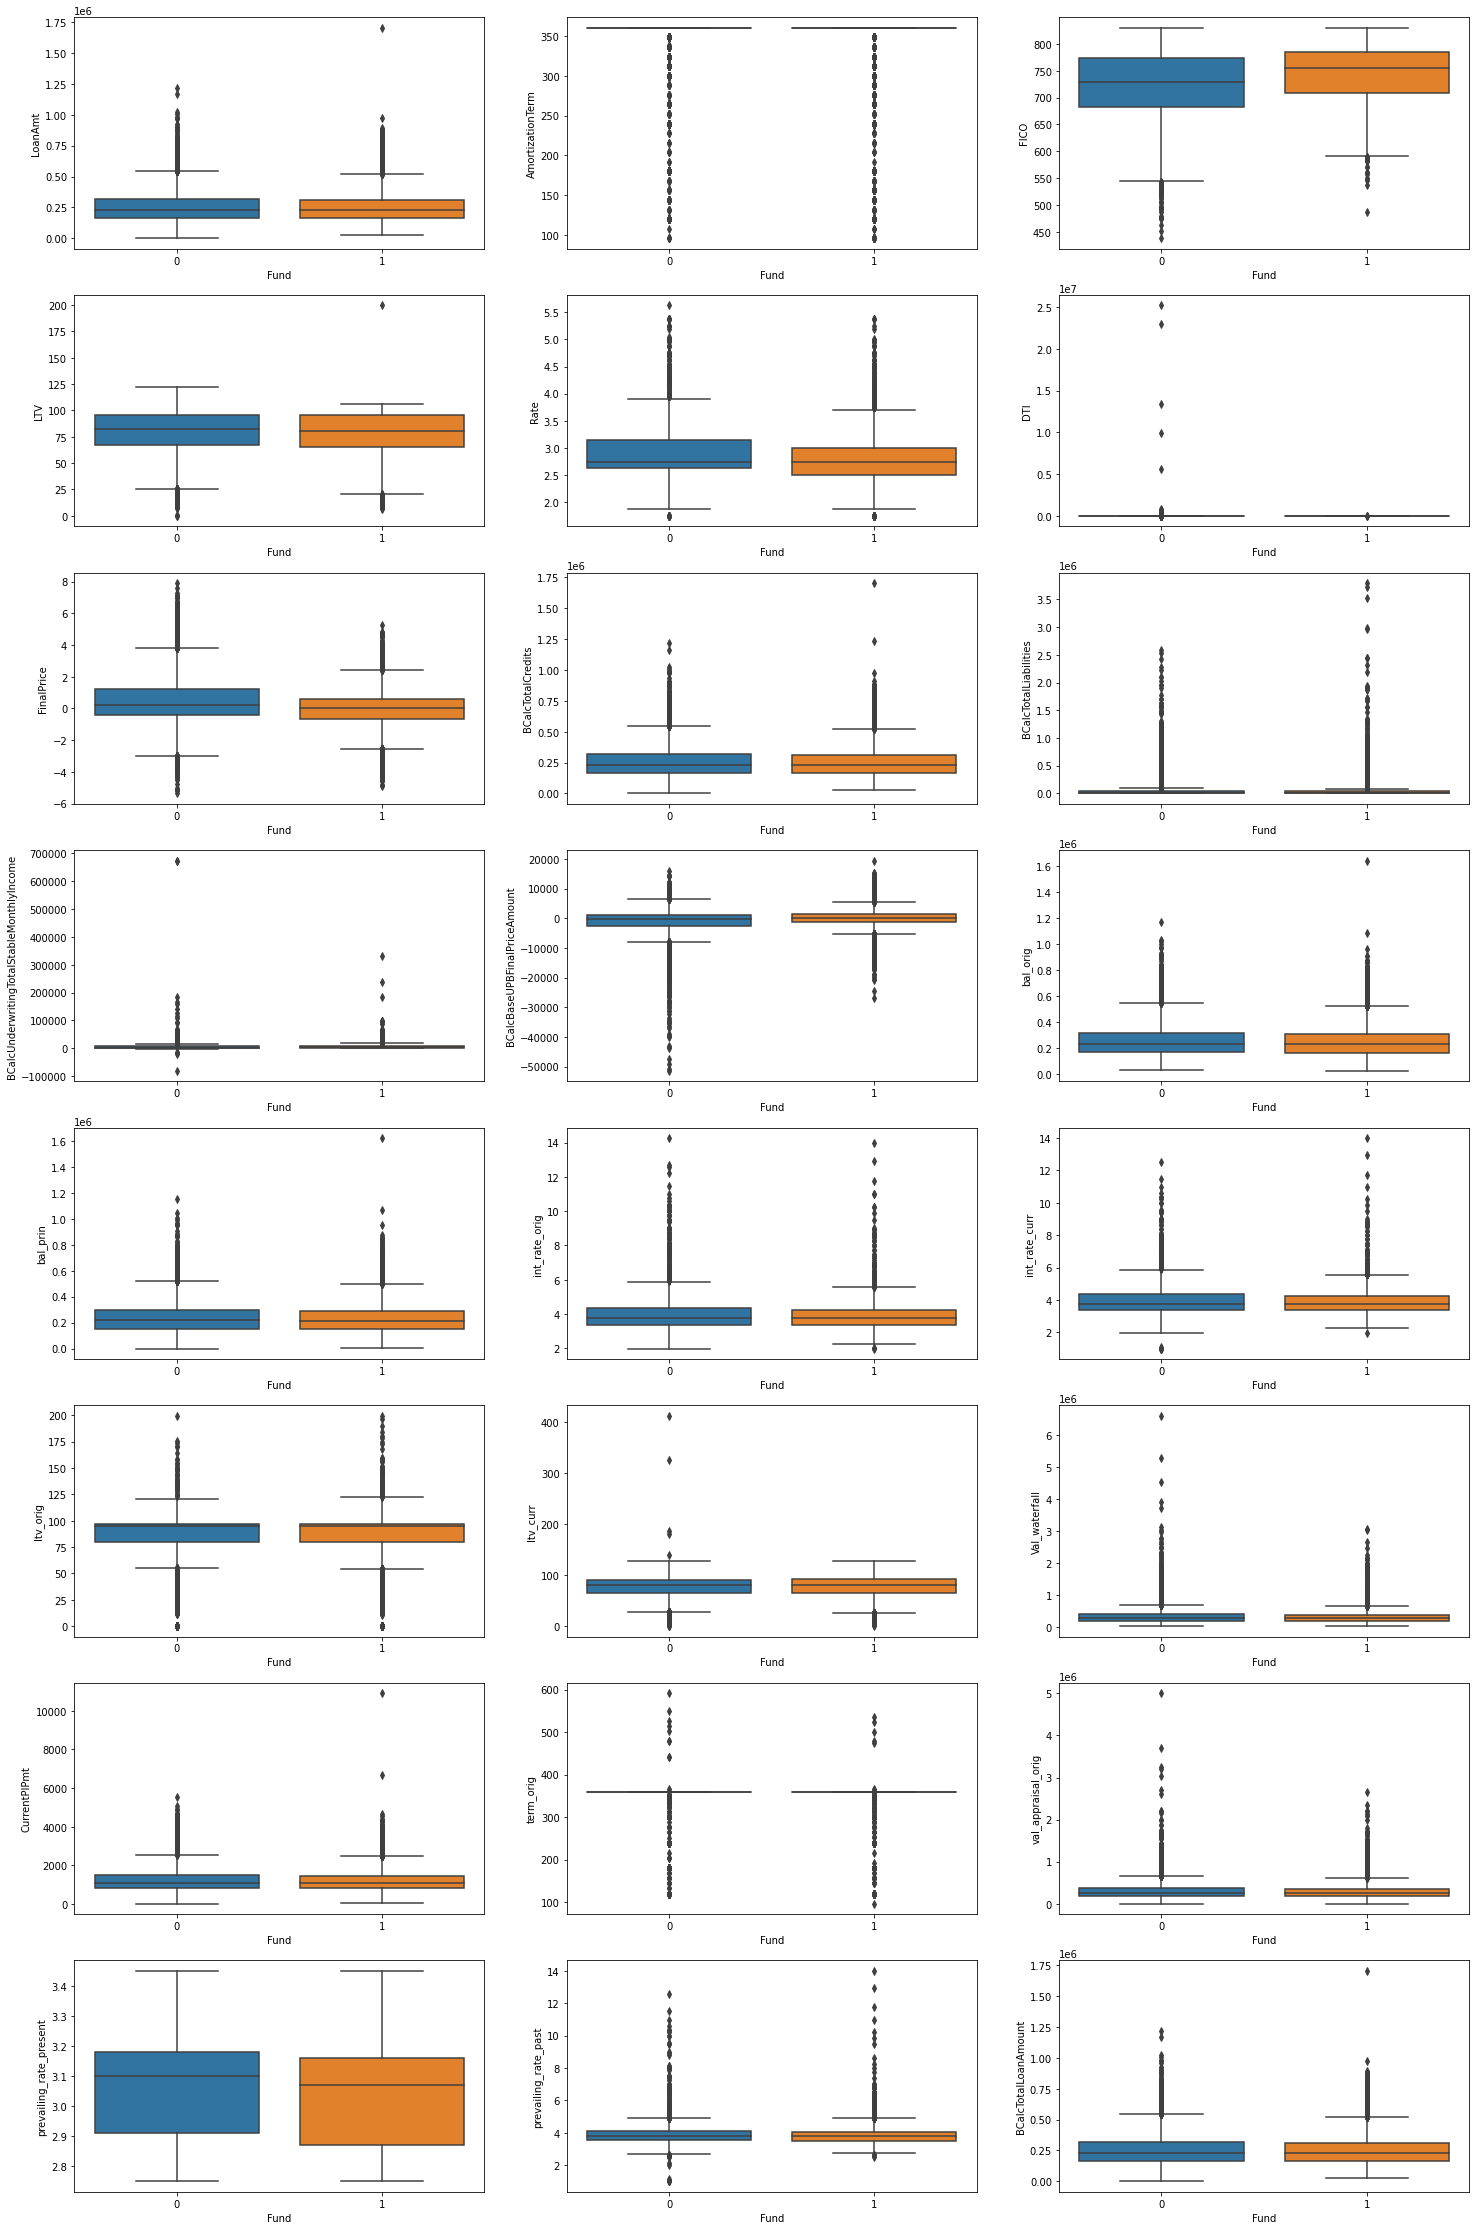

In [ ]:
#let's get boxplots of these variables
f, axes = plt.subplots(rows_float_cols, 3,figsize=(25,40))
i = 1
for col in float_cols:
    plt.subplot(rows_float_cols,3,i)
    sns.boxplot(x='Fund',y= col, data=df)
    i = i+1

<AxesSubplot:>

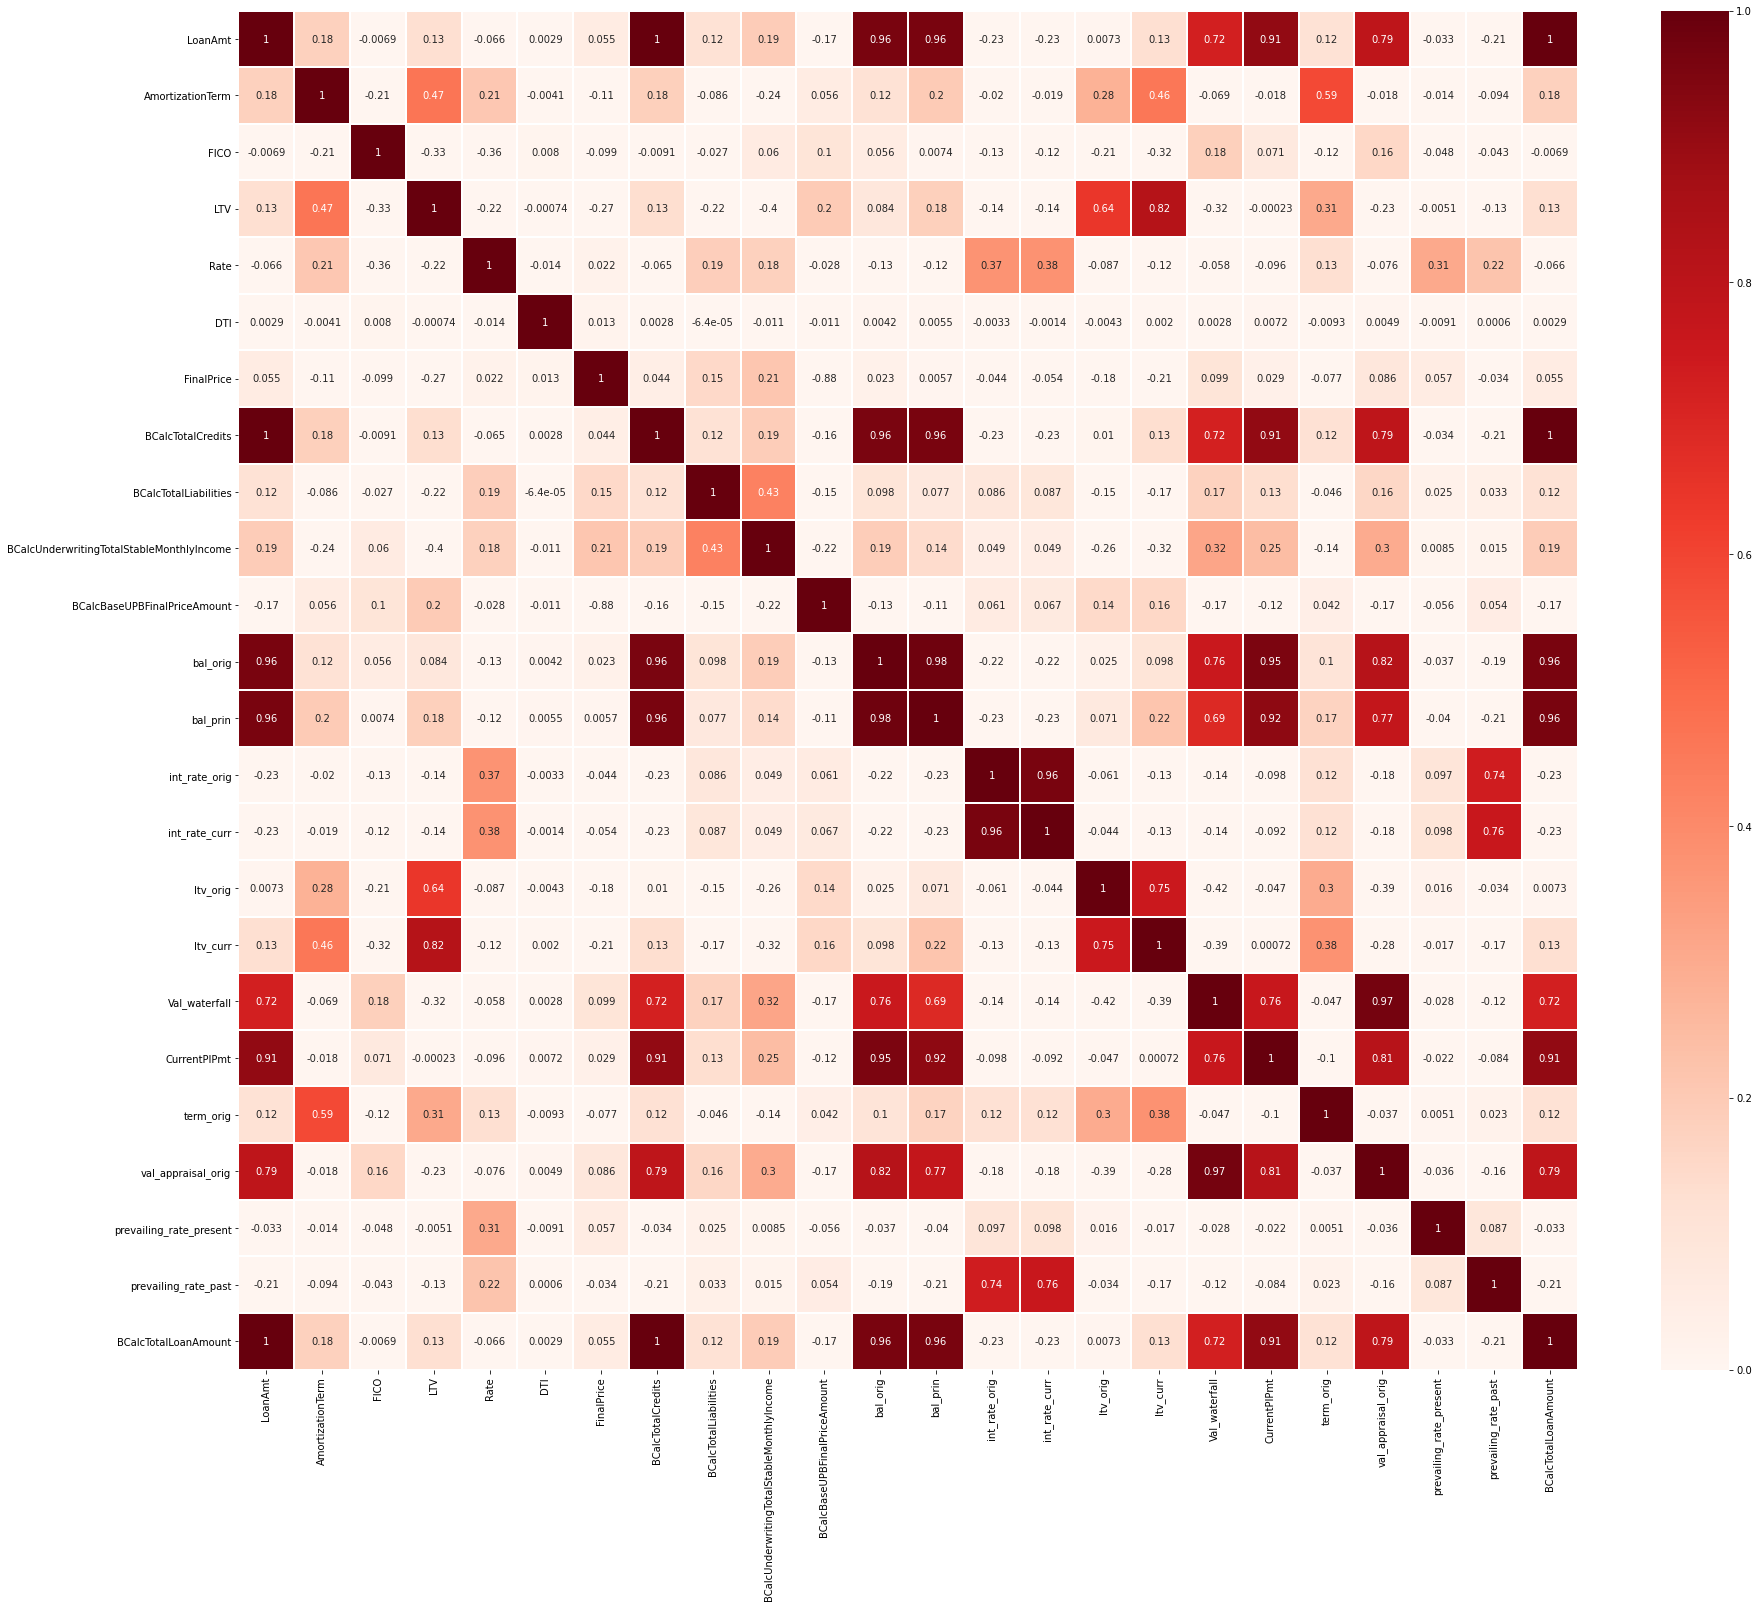

In [ ]:
#let's plot correlation map
plt.figure(figsize=(30,25))
sns.heatmap(df[float_cols].corr(),  vmin=0, vmax=1, cmap="Reds", linewidths=0.4, annot=True)

In [ ]:
#get columns who have >0.95 correlation with any of the other columns
corr_matrix = df[float_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [ ]:
to_drop

['BCalcTotalCredits',
 'bal_orig',
 'bal_prin',
 'int_rate_curr',
 'CurrentPIPmt',
 'val_appraisal_orig',
 'BCalcTotalLoanAmount']

In [ ]:
for col in to_drop:  
    print('drop_col : ',col)
    for column in float_cols:
        try:
            val = df[col].corr(df[column])
            if abs(val) > 0.9 and column not in to_drop:
                print(col, column,val, '\n')
        except:
            pass

drop_col :  BCalcTotalCredits
BCalcTotalCredits LoanAmt 0.9994235756361618 

drop_col :  bal_orig
bal_orig LoanAmt 0.9616644975363593 

drop_col :  bal_prin
bal_prin LoanAmt 0.9642577870569737 

drop_col :  int_rate_curr
int_rate_curr int_rate_orig 0.9631124760272284 

drop_col :  CurrentPIPmt
CurrentPIPmt LoanAmt 0.9140114376515158 

drop_col :  val_appraisal_orig
val_appraisal_orig Val_waterfall 0.9722445564828905 

drop_col :  BCalcTotalLoanAmount
BCalcTotalLoanAmount LoanAmt 1.0 



In [ ]:
remove_cols = ['BCalcTotalCredits','BCalcTotalLoanAmount']
df.drop(remove_cols,axis=1,inplace=True)
test.drop(remove_cols,axis=1,inplace=True)
float_cols = [x for x in float_cols if x not in remove_cols]
len(float_cols)

22

In [ ]:
fund_list = [0.0,1.0]
def densityplots(df, start_col_num, end_col_num, total_cols,cols_used,target_col):
    f, ax = plt.subplots(total_cols, 1,figsize=(12,50))
    i = 1
    
    for col in cols_used[start_col_num:end_col_num]:
        plt.subplot(total_cols,1,i)
        
        for fund_value in fund_list:    
            subset = df[df[target_col]==fund_value ]         
            ax = sns.distplot(subset[col], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 rug_kws={'color': 'black'},
                 label = fund_value)
            
        i = i+1

In [ ]:
df[['int_rate_curr','prevailing_rate_past']].head()

,int_rate_curr,prevailing_rate_past
0,4.750,4.750
1,4.500,4.500
2,4.625,3.390
3,4.375,4.375
4,2.750,2.820


In [ ]:
df['term_orig'].value_counts()

360.0    35307
180.0     1848
240.0      613
300.0      305
120.0       86
348.0       85
336.0       68
324.0       35
312.0       26
156.0       15
276.0       13
288.0       11
144.0        8
264.0        7
168.0        5
480.0        3
252.0        3
204.0        3
351.0        2
216.0        2
132.0        2
365.0        2
441.0        2
352.0        1
96.0         1
515.0        1
354.0        1
344.0        1
318.0        1
251.0        1
527.0        1
502.0        1
523.0        1
536.0        1
591.0        1
341.0        1
499.0        1
361.0        1
549.0        1
356.0        1
192.0        1
364.0        1
474.0        1
331.0        1
Name: term_orig, dtype: int64

<AxesSubplot:xlabel='Fund', ylabel='Rate'>

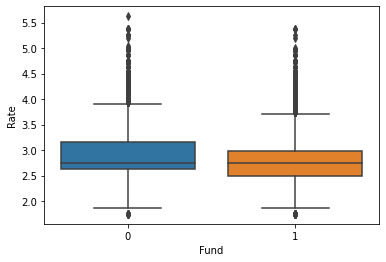

In [ ]:
sns.boxplot(x = 'Fund',y = 'Rate',data=df)

<AxesSubplot:xlabel='Fund', ylabel='FinalPrice'>

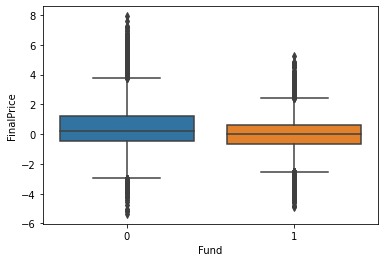

In [ ]:
sns.boxplot(x = 'Fund',y = 'FinalPrice',data=df)

In [ ]:
df['DTI'].value_counts()

 0.000000e+00    17190
 1.000000e+01      197
 1.000000e+00       73
 3.500000e+01        6
 3.300000e+01        6
 4.296900e+01        5
 4.429200e+01        5
 3.962500e+01        5
 1.427600e+01        5
 4.000000e+01        5
 4.135000e+01        5
 2.128800e+01        5
 2.000000e+01        5
 3.757800e+01        5
 2.921100e+01        4
 3.857500e+01        4
 4.051400e+01        4
 2.746200e+01        4
 4.490700e+01        4
 4.131900e+01        4
 3.362200e+01        4
 3.817700e+01        4
 3.283900e+01        4
 4.388800e+01        4
 2.720600e+01        4
 3.330500e+01        4
 4.468400e+01        4
 4.881200e+01        4
 4.217700e+01        4
 4.183200e+01        4
 2.180700e+01        4
 4.807000e+01        4
 3.758000e+01        4
 3.537800e+01        4
 4.279500e+01        4
 3.578700e+01        4
 2.560700e+01        4
 4.606500e+01        4
 4.321500e+01        4
 3.133500e+01        4
 4.029000e+01        4
 4.464600e+01        4
 4.203500e+01        4
 4.691400e+

In [ ]:
print(df.shape)
print(test.shape)

(38472, 44)
(3527, 43)


In [ ]:
df.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,prevailing_rate_present,prevailing_rate_past,Fund,orig_years
0,9778156191,206043.0,FHA,FHA,FULL,360.0,605.0,67.500,4.05,40.832,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,TRUE,0.575,False,FALSE,57280.0,6250.0,-1184.7472,UNKNOWN,165938.0,146287.46,4.750,4.750,96.50,63.013845,232151.30,UNKNOWN,0-29,FIXED,865.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,169000.0,OTHER,OTHER,3.04,4.750,0,5+
1,9752717661,199000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,790.0,30.616,2.90,69.234,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,1426.0,1794.6,0.0000,CREDIT TRIGGER,240000.0,194752.51,4.500,4.500,53.33,32.213605,604566.02,UNKNOWN,0-29,FIXED,1216.04,FULL DOC,CONV,OWNER OCCUPIED,360.0,450000.0,CREDIT TRIGGERS,TRIGGERS / SIGNALS,2.88,4.500,0,5+
2,9777231680,126254.0,FHA,FHA,STREAMLINE,360.0,NaN,90.572,2.75,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-0.447,False,FALSE,0.0,0.0,564.3554,SERVICING XFER,134518.0,123319.63,4.625,4.625,96.50,80.277709,153616.28,UNKNOWN,0-29,FIXED,691.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,140000.0,SERVICING XFER,SERVICING,2.90,3.390,0,3-5 YRS
3,9705101740,87000.0,CONVENTIONAL,CONVENTIONAL,FULL,240.0,741.0,54.375,3.25,41.309,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,19345.0,4016.2,0.0000,MONTHLY BENEFIT MKTG,100000.0,86022.89,4.375,4.375,68.97,51.198079,168019.76,UNKNOWN,0-29,FIXED,499.29,FULL DOC,CONV,OWNER OCCUPIED,360.0,145000.0,BENEFIT,DM MARKETING,2.87,4.375,0,5+
4,9772864451,93967.0,VA,VA,STREAMLINE,360.0,NaN,100.972,2.25,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,2.989,False,TRUE,0.0,0.0,-2808.6736,SERVICING XFER,92600.0,90924.59,2.750,2.750,102.50,101.148701,89892.00,REFI RATE TERM,0-29,FIXED,378.03,STREAMLINED,VA,OWNER OCCUPIED,360.0,89892.0,SERVICING XFER,SERVICING,2.89,2.820,0,< 1


In [ ]:
test.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,prevailing_rate_present,prevailing_rate_past,orig_years
0,9753293654,321530.0,FHA,FHA,FULL,360,581.0,80.000,3.25,49.568,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,FALSE,0.000,False,FALSE,120293.0,9538.01,0.0000,None,278557.0,274534.28,2.750,2.750,96.06,96.327818,285000.00,REFI RATE TERM,0-29,FIXED,1137.18,STREAMLINED,FHA,OWNER OCCUPIED,360.0,285000.0,ILG,ILG,3.25,2.78,< 1
1,9797207454,228900.0,CONVENTIONAL,CONVENTIONAL,FULL,360,672.0,69.787,3.20,43.552,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,1.871,False,FALSE,14250.0,4160.00,-4282.7190,LC CALL LIST,228759.0,221058.42,4.125,4.125,97.75,91.789300,240832.45,REFI RATE TERM,0-29,FIXED,1108.68,FULL DOC,FHA,OWNER OCCUPIED,360.0,230000.0,LC CALL LIST,LC CALL LIST,3.22,3.57,1-3 YRS
2,9731214855,326200.0,VA,VA,FULL,360,743.0,74.137,2.95,30.724,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,FALSE,0.125,False,TRUE,28331.0,8752.57,-407.7500,UNKNOWN,300000.0,281537.22,4.000,4.000,95.24,82.858467,339780.87,UNKNOWN,0-29,FIXED,1432.25,FULL DOC,VA,OWNER OCCUPIED,360.0,315000.0,OTHER,OTHER,3.22,4.50,3-5 YRS
3,9715552072,254103.0,FHA,FHA,STREAMLINE,360,NaN,94.717,3.45,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-3.258,False,FALSE,0.0,0.00,8278.6757,LC CALL LIST,258888.0,249204.76,4.625,4.250,96.50,86.802581,287093.72,UNKNOWN,0-29,FIXED,1302.93,FULL DOC,FHA,OWNER OCCUPIED,360.0,265000.0,LC CALL LIST,LC CALL LIST,3.21,3.98,3-5 YRS
4,9783648141,136000.0,CONVENTIONAL,CONVENTIONAL,FULL,180,751.0,34.000,2.75,44.327,PRIMARY RESIDENCE,CONDOMINIUM,1,C/O: OTHER,TRUE,2.284,False,FALSE,74187.0,7269.60,-3106.2400,ADHOC,139650.0,114174.16,4.000,4.000,95.00,36.830374,310000.00,UNKNOWN,0-29,FIXED,666.71,FULL DOC,PMI,OWNER OCCUPIED,360.0,148000.0,OTHER,DM MARKETING,3.17,4.00,5+


### feature engineering

In [ ]:
df['change_in_loan_type'] = ~(df['LoanType']==df['loan_type'])
test['change_in_loan_type'] = ~(test['LoanType']==test['loan_type'])

In [ ]:
df[['Rate','int_rate_curr']].head()

,Rate,int_rate_curr
0,4.05,4.750
1,2.90,4.500
2,2.75,4.625
3,3.25,4.375
4,2.25,2.750


In [ ]:
df['diff_in_rate'] = df['Rate'] - df['int_rate_curr']
test['diff_in_rate'] = test['Rate'] - test['int_rate_curr']

In [ ]:
df[['LTV','ltv_orig','ltv_curr']].head()

,LTV,ltv_orig,ltv_curr
0,67.500,96.50,63.013845
1,30.616,53.33,32.213605
2,90.572,96.50,80.277709
3,54.375,68.97,51.198079
4,100.972,102.50,101.148701


In [ ]:
df['diff_in_LTV'] = df['LTV'] - df['ltv_orig']
test['diff_in_LTV'] = test['LTV'] - test['ltv_orig']

In [ ]:
df[['LoanAmt','bal_orig']].head()

,LoanAmt,bal_orig
0,206043.0,165938.0
1,199000.0,240000.0
2,126254.0,134518.0
3,87000.0,100000.0
4,93967.0,92600.0


In [ ]:
df['diff_in_loan'] = df['LoanAmt'] - df['bal_orig']
test['diff_in_loan'] = test['LoanAmt'] - test['bal_orig']

In [ ]:
df.loc[((df['FICO'].isnull()) & (df['DocumentType']=='STREAMLINE')),'FICO'] = 680
test.loc[((test['FICO'].isnull()) & (test['DocumentType']=='STREAMLINE')),'FICO'] = 680

In [ ]:
df['val_waterfall_present'] = (df['LoanAmt']/df['LTV'])*100
df['diff_val_waterfall'] = df['val_waterfall_present'] - df['Val_waterfall']
test['val_waterfall_present'] = (test['LoanAmt']/test['LTV'])*100
test['diff_val_waterfall'] = test['val_waterfall_present'] - test['Val_waterfall']
df[['Val_waterfall','val_waterfall_present']].head()

,Val_waterfall,val_waterfall_present
0,232151.30,305248.888889
1,604566.02,649986.934936
2,153616.28,139396.281411
3,168019.76,160000.000000
4,89892.00,93062.433150


In [ ]:
df[['prevailing_rate_present','prevailing_rate_past']].head()

,prevailing_rate_present,prevailing_rate_past
0,3.04,4.750
1,2.88,4.500
2,2.90,3.390
3,2.87,4.375
4,2.89,2.820


In [ ]:
df['diff_prevailing_rates'] = df['prevailing_rate_present']-df['prevailing_rate_past']
test['diff_prevailing_rates'] = test['prevailing_rate_present']-test['prevailing_rate_past']

In [ ]:
df.drop(['prevailing_rate_present','prevailing_rate_past'],axis=1,inplace=True)
test.drop(['prevailing_rate_present','prevailing_rate_past'],axis=1,inplace=True)
float_cols = [x for x in float_cols if x not in ['prevailing_rate_present','prevailing_rate_past']]

In [ ]:
df.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,Fund,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
0,9778156191,206043.0,FHA,FHA,FULL,360.0,605.0,67.500,4.05,40.832,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,TRUE,0.575,False,FALSE,57280.0,6250.0,-1184.7472,UNKNOWN,165938.0,146287.46,4.750,4.750,96.50,63.013845,232151.30,UNKNOWN,0-29,FIXED,865.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,169000.0,OTHER,OTHER,0,5+,False,-0.700,-29.000,40105.0,305248.888889,73097.588889,-1.710
1,9752717661,199000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,790.0,30.616,2.90,69.234,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,1426.0,1794.6,0.0000,CREDIT TRIGGER,240000.0,194752.51,4.500,4.500,53.33,32.213605,604566.02,UNKNOWN,0-29,FIXED,1216.04,FULL DOC,CONV,OWNER OCCUPIED,360.0,450000.0,CREDIT TRIGGERS,TRIGGERS / SIGNALS,0,5+,True,-1.600,-22.714,-41000.0,649986.934936,45420.914936,-1.620
2,9777231680,126254.0,FHA,FHA,STREAMLINE,360.0,680.0,90.572,2.75,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-0.447,False,FALSE,0.0,0.0,564.3554,SERVICING XFER,134518.0,123319.63,4.625,4.625,96.50,80.277709,153616.28,UNKNOWN,0-29,FIXED,691.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,140000.0,SERVICING XFER,SERVICING,0,3-5 YRS,False,-1.875,-5.928,-8264.0,139396.281411,-14219.998589,-0.490
3,9705101740,87000.0,CONVENTIONAL,CONVENTIONAL,FULL,240.0,741.0,54.375,3.25,41.309,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,19345.0,4016.2,0.0000,MONTHLY BENEFIT MKTG,100000.0,86022.89,4.375,4.375,68.97,51.198079,168019.76,UNKNOWN,0-29,FIXED,499.29,FULL DOC,CONV,OWNER OCCUPIED,360.0,145000.0,BENEFIT,DM MARKETING,0,5+,True,-1.125,-14.595,-13000.0,160000.000000,-8019.760000,-1.505
4,9772864451,93967.0,VA,VA,STREAMLINE,360.0,680.0,100.972,2.25,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,2.989,False,TRUE,0.0,0.0,-2808.6736,SERVICING XFER,92600.0,90924.59,2.750,2.750,102.50,101.148701,89892.00,REFI RATE TERM,0-29,FIXED,378.03,STREAMLINED,VA,OWNER OCCUPIED,360.0,89892.0,SERVICING XFER,SERVICING,0,< 1,False,-0.500,-1.528,1367.0,93062.433150,3170.433150,0.070


In [ ]:
sum(df['diff_in_rate']>0) / df.shape[0]*100

3.5480349344978164

In [ ]:
df['RefinancePurpose'].value_counts()

NO C/O: RATE/TERM    31235
C/O: DEBT CONSOL      6480
C/O: OTHER             319
LIMITED C/O            266
C/O: HOME IMP           82
Name: RefinancePurpose, dtype: int64

In [ ]:
df['NewConstructionFlag'].value_counts()

False    34730
True       160
Name: NewConstructionFlag, dtype: int64

In [ ]:
df['BCalcTotalLiabilities'].describe()

count    3.845200e+04
mean     4.076821e+04
std      1.231341e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.640000e+02
75%      3.540900e+04
max      3.796412e+06
Name: BCalcTotalLiabilities, dtype: float64

In [ ]:
df.isnull().mean()*100

LoanNumber                                   0.000000
LoanAmt                                      0.000000
ProductGroup                                 0.000000
LoanType                                     0.000000
DocumentType                                 0.000000
AmortizationTerm                             0.002599
FICO                                         0.012996
LTV                                          0.000000
Rate                                         0.000000
DTI                                          0.000000
ResidencyType                                0.000000
PropertyType                                 0.000000
NumberOfUnits                                0.000000
RefinancePurpose                             0.233936
FTHBFlag                                     0.000000
FinalPrice                                   0.000000
NewConstructionFlag                          9.310667
BW1IsAVeteran                                0.000000
BCalcTotalLiabilities       

In [ ]:
float_cols = float_cols+['diff_in_rate','diff_in_LTV','diff_in_loan','val_waterfall_present','diff_val_waterfall','diff_prevailing_rates']
object_cols.append('change_in_loan_type')

In [ ]:
object_cols.remove('LoanNumber')

In [ ]:
#### remove categories of object columns which are of single digits
for col in object_cols:
    print(col)
    for item in df[col].value_counts().keys():
        if df[col].value_counts().get(key=item)  < 10:
            df[col] = df[col].replace(item,np.nan)
            test[col] = test[col].replace(item,np.nan)

ProductGroup
LoanType
DocumentType
ResidencyType
PropertyType
RefinancePurpose
FTHBFlag
NewConstructionFlag
AttributedCampaignCategory
loan_purpose
delq_status_mba
product_type_curr
doc_type
loan_type
occ_type_orig
Campaign_Group
Marketing_Group
BW1IsAVeteran
orig_years
change_in_loan_type


In [ ]:
for col in float_cols:
    val = df[col].mean()
    df[col] = df[col].replace(np.nan,val)
    test[col] = test[col].replace(np.nan,val)

In [ ]:
for col in object_cols:
    val = df[col].mode()[0]
    df[col] = df[col].replace(np.nan,val)
    test[col] = test[col].replace(np.nan,val)

In [ ]:
df.isnull().sum()

LoanNumber                                   0
LoanAmt                                      0
ProductGroup                                 0
LoanType                                     0
DocumentType                                 0
AmortizationTerm                             0
FICO                                         0
LTV                                          0
Rate                                         0
DTI                                          0
ResidencyType                                0
PropertyType                                 0
NumberOfUnits                                0
RefinancePurpose                             0
FTHBFlag                                     0
FinalPrice                                   0
NewConstructionFlag                          0
BW1IsAVeteran                                0
BCalcTotalLiabilities                        0
BCalcUnderwritingTotalStableMonthlyIncome    0
BCalcBaseUPBFinalPriceAmount                 0
AttributedCam

In [ ]:
df['Fund'].value_counts(normalize=True)*100

1    60.246413
0    39.753587
Name: Fund, dtype: float64

In [ ]:
df.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,Fund,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
0,9778156191,206043.0,FHA,FHA,FULL,360.0,605.0,67.500,4.05,40.832,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,TRUE,0.575,False,FALSE,57280.0,6250.0,-1184.7472,UNKNOWN,165938.0,146287.46,4.750,4.750,96.50,63.013845,232151.30,UNKNOWN,0-29,FIXED,865.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,169000.0,OTHER,OTHER,0,5+,False,-0.700,-29.000,40105.0,305248.888889,73097.588889,-1.710
1,9752717661,199000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,790.0,30.616,2.90,69.234,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,1426.0,1794.6,0.0000,CREDIT TRIGGER,240000.0,194752.51,4.500,4.500,53.33,32.213605,604566.02,UNKNOWN,0-29,FIXED,1216.04,FULL DOC,CONV,OWNER OCCUPIED,360.0,450000.0,CREDIT TRIGGERS,TRIGGERS / SIGNALS,0,5+,True,-1.600,-22.714,-41000.0,649986.934936,45420.914936,-1.620
2,9777231680,126254.0,FHA,FHA,STREAMLINE,360.0,680.0,90.572,2.75,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-0.447,False,FALSE,0.0,0.0,564.3554,SERVICING XFER,134518.0,123319.63,4.625,4.625,96.50,80.277709,153616.28,UNKNOWN,0-29,FIXED,691.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,140000.0,SERVICING XFER,SERVICING,0,3-5 YRS,False,-1.875,-5.928,-8264.0,139396.281411,-14219.998589,-0.490
3,9705101740,87000.0,CONVENTIONAL,CONVENTIONAL,FULL,240.0,741.0,54.375,3.25,41.309,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,19345.0,4016.2,0.0000,MONTHLY BENEFIT MKTG,100000.0,86022.89,4.375,4.375,68.97,51.198079,168019.76,UNKNOWN,0-29,FIXED,499.29,FULL DOC,CONV,OWNER OCCUPIED,360.0,145000.0,BENEFIT,DM MARKETING,0,5+,True,-1.125,-14.595,-13000.0,160000.000000,-8019.760000,-1.505
4,9772864451,93967.0,VA,VA,STREAMLINE,360.0,680.0,100.972,2.25,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,2.989,False,TRUE,0.0,0.0,-2808.6736,SERVICING XFER,92600.0,90924.59,2.750,2.750,102.50,101.148701,89892.00,REFI RATE TERM,0-29,FIXED,378.03,STREAMLINED,VA,OWNER OCCUPIED,360.0,89892.0,SERVICING XFER,SERVICING,0,< 1,False,-0.500,-1.528,1367.0,93062.433150,3170.433150,0.070


In [ ]:
#train and test set splitting
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, stratify=df['Fund'], test_size=0.2, random_state = 10)

In [ ]:
df_train.shape, df_test.shape, test.shape

((30777, 49), (7695, 49), (3527, 48))

In [ ]:
df_train.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,Fund,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
6831,9759086011,146200.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,714.0,74.975,3.625,34.775,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,FALSE,0.000,False,FALSE,59154.0,7807.83,0.0000,QUICK QUOTE,146700.0,141997.77,5.375,5.375,90.00,80.991425,175324.45,UNKNOWN,0-29,FIXED,821.48,FULL DOC,PMI,OWNER OCCUPIED,360.0,165000.0,GENERAL QUICK QUOTE,OTHER,0,1-3 YRS,True,-1.750,-15.025,-500.0,194998.332778,19673.882778,-2.20
6908,9738162040,387130.0,FHA,FHA,STREAMLINE,360.0,680.0,95.357,2.750,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-0.688,False,FALSE,0.0,0.00,2663.4544,WEBSITE,391773.0,383290.62,4.125,4.125,96.50,94.853053,404088.86,PURCHASE,0-29,FIXED,1898.73,FULL DOC,FHA,OWNER OCCUPIED,360.0,399000.0,WEBSITE,WEBSITE,1,1-3 YRS,False,-1.375,-1.143,-4643.0,405979.634426,1890.774426,-0.75
9900,9796414028,220000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,697.0,57.895,3.250,44.076,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,FALSE,0.125,False,FALSE,8147.0,3803.25,-275.0000,ADHOC,199314.0,196798.32,2.750,2.750,68.73,69.052042,285000.00,REFI RATE TERM,0-29,FIXED,813.68,STREAMLINED,FHA,OWNER OCCUPIED,360.0,285000.0,OTHER,EMAIL MARKETING,1,< 1,True,0.500,-10.835,20686.0,379998.272735,94998.272735,0.04
30905,9754348861,247000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,789.0,74.849,2.950,36.456,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,TRUE,0.156,False,FALSE,40551.0,7853.73,-385.3200,ADHOC,220000.0,215258.47,3.750,3.750,76.66,72.949969,295076.85,REFI CASH OUT,0-29,ARM,1018.85,FULL DOC,CONV,OWNER OCCUPIED,360.0,287000.0,OTHER,EMAIL MARKETING,1,1-3 YRS,True,-0.800,-1.811,27000.0,329997.728761,34920.878761,-0.35
23725,9776290752,206477.0,VA,VA,STREAMLINE,360.0,680.0,98.111,2.250,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,FALSE,0.518,False,TRUE,0.0,0.00,-1069.5509,LC CALL LIST,209407.0,200937.67,3.625,3.625,100.00,92.687728,216789.94,PURCHASE,0-29,FIXED,955.00,FULL DOC,VA,OWNER OCCUPIED,360.0,210000.0,LC CALL LIST,LC CALL LIST,1,1-3 YRS,False,-1.375,-1.889,-2930.0,210452.446719,-6337.493281,-0.75


In [ ]:
def calc_smooth_mean(df, by, on, m):
    mean = df[on].mean()
    agg = df.groupby(by)[on].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts*means+m*mean)/(counts+m)
    return smooth

In [ ]:
# Target Encoding for categorical variables
for col in object_cols:
    smooth = calc_smooth_mean(df_train,col,'Fund',1000)
    df_train[col] = df_train[col].map(smooth*100)
    df_test[col] = df_test[col].map(smooth*100)
    test[col] = test[col].map(smooth*100)

In [ ]:
df_train.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,Fund,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
6831,9759086011,146200.0,63.221475,63.176291,61.857461,360.0,714.0,74.975,3.625,34.775,60.553451,60.977385,1,59.440054,59.627587,0.000,60.235917,59.583949,59154.0,7807.83,0.0000,62.628176,146700.0,141997.77,5.375,5.375,90.00,80.991425,175324.45,59.681811,60.491265,60.278468,821.48,60.186950,64.221384,60.545974,360.0,165000.0,62.520540,63.348178,0,60.295302,62.525953,-1.750,-15.025,-500.0,194998.332778,19673.882778,-2.20
6908,9738162040,387130.0,53.410819,53.458185,58.585097,360.0,680.0,95.357,2.750,0.000,60.553451,60.977385,1,59.440054,61.012586,-0.688,60.235917,59.583949,0.0,0.00,2663.4544,60.858133,391773.0,383290.62,4.125,4.125,96.50,94.853053,404088.86,57.964442,60.491265,60.278468,1898.73,60.186950,55.384358,60.545974,360.0,399000.0,60.869126,60.662793,1,60.295302,58.137336,-1.375,-1.143,-4643.0,405979.634426,1890.774426,-0.75
9900,9796414028,220000.0,63.221475,63.176291,61.857461,360.0,697.0,57.895,3.250,44.076,60.553451,60.977385,1,62.525533,59.627587,0.125,60.235917,59.583949,8147.0,3803.25,-275.0000,64.895284,199314.0,196798.32,2.750,2.750,68.73,69.052042,285000.00,62.701004,60.491265,60.278468,813.68,60.573645,55.384358,60.545974,360.0,285000.0,63.845972,64.010813,1,63.285104,62.525953,0.500,-10.835,20686.0,379998.272735,94998.272735,0.04
30905,9754348861,247000.0,63.221475,63.176291,61.857461,360.0,789.0,74.849,2.950,36.456,60.553451,60.977385,1,62.525533,61.012586,0.156,60.235917,59.583949,40551.0,7853.73,-385.3200,64.895284,220000.0,215258.47,3.750,3.750,76.66,72.949969,295076.85,62.157431,60.491265,59.363649,1018.85,60.186950,62.434767,60.545974,360.0,287000.0,63.845972,64.010813,1,60.295302,62.525953,-0.800,-1.811,27000.0,329997.728761,34920.878761,-0.35
23725,9776290752,206477.0,61.949860,61.969705,58.585097,360.0,680.0,98.111,2.250,0.000,60.553451,60.977385,1,59.440054,59.627587,0.518,60.235917,61.817893,0.0,0.00,-1069.5509,57.867588,209407.0,200937.67,3.625,3.625,100.00,92.687728,216789.94,57.964442,60.491265,60.278468,955.00,60.186950,62.125337,60.545974,360.0,210000.0,57.158397,57.126329,1,60.295302,58.137336,-1.375,-1.889,-2930.0,210452.446719,-6337.493281,-0.75


In [ ]:
X_train = df_train.drop(['LoanNumber','Fund'],axis=1)
X_test = df_test.drop(['LoanNumber','Fund'],axis=1)
X_val = test.drop('LoanNumber',axis=1)
y_train = df_train['Fund']
y_test = df_test['Fund']

In [ ]:
df_train_lgb = X_train
y_train_lgb = np.array(y_train)

In [ ]:
df_test_lgb = X_test
df_eval_lgb = X_val

In [ ]:
X_test.shape, X_val.shape

((7695, 47), (3527, 47))

In [ ]:
random_seed = 12345

In [ ]:
#for encoded version
train_data = lgb.Dataset(data = df_train_lgb, label = y_train_lgb)

def lgb_eval(num_iterations,num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight,learning_rate,min_data_in_leaf,bagging_freq):
    params = {'application':'binary', 'learning_rate':0.01, 'early_stopping_round':100, 'metric':'auc'} #f_roc_auc for roc_auc
    params['num_iterations'] = int(num_iterations)
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight
    params['learning_rate'] = learning_rate
    params['min_data_in_leaf'] = int(round(min_data_in_leaf))
    params['bagging_freq'] = int(round(bagging_freq))
    cv_result = lgb.cv(params, train_data, nfold=10, seed=random_seed, stratified=True, verbose_eval =200, metrics = ['auc']) #feval = f_roc_auc for roc_auc isntead of metrics = ['auc']
    return max(cv_result['auc-mean'])

In [ ]:
from bayes_opt import BayesianOptimization
lgbBO = BayesianOptimization(lgb_eval, {'num_iterations': (10,5000),
                                        'num_leaves': (24, 45),
                                        'feature_fraction': (0.1, 0.9),
                                        'bagging_fraction': (0.8, 1),
                                        'max_depth': (5, 8.99),
                                        'lambda_l1': (0, 5),
                                        'lambda_l2': (0, 3),
                                        'min_split_gain': (0.001, 0.1),
                                        'min_child_weight': (5, 50), 
                                        'learning_rate' : (0,1),
                                        'min_data_in_leaf' : (50,200),
                                        'bagging_freq' : (1,10)}, random_state=0)

lgbBO.maximize(init_points=10, n_iter=15)

In [ ]:
parameters = {'bagging_fraction': 0.909762700785465,
 'bagging_freq': 7.436704297351775,
 'feature_fraction': 0.5822107008573151,
 'lambda_l1': 2.724415914984484,
 'lambda_l2': 1.270964398016714,
 'learning_rate': 0.6458941130666561,
 'max_depth': 6.7459729729381435,
 'min_child_weight': 45.12978503519359,
 'min_data_in_leaf': 194.5494140751544,
 'min_split_gain': 0.038960710363751996,
 'num_iterations': 3960.7079400324965,
 'num_leaves': 35.10679331481099}

In [ ]:
parameters['num_iterations']

3960.7079400324965

In [ ]:
parameters

{'bagging_fraction': 0.909762700785465,
 'bagging_freq': 7.436704297351775,
 'feature_fraction': 0.5822107008573151,
 'lambda_l1': 2.724415914984484,
 'lambda_l2': 1.270964398016714,
 'learning_rate': 0.6458941130666561,
 'max_depth': 6.7459729729381435,
 'min_child_weight': 45.12978503519359,
 'min_data_in_leaf': 194.5494140751544,
 'min_split_gain': 0.038960710363751996,
 'num_iterations': 3960.7079400324965,
 'num_leaves': 35.10679331481099}

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [ ]:
lgb_auc_score = []
# preds_lgb_train = []
preds_lgb_test = []
preds_lgb_val = []

lgbfold=StratifiedKFold(n_splits=10, random_state=12345, shuffle=True)
i = 1
print(f"Seed: {random_seed}")
for train_idx, val_idx in lgbfold.split(df_train_lgb, y_train_lgb):
    X_train_train_lgb, X_val_train_lgb = df_train_lgb.iloc[train_idx], df_train_lgb.iloc[val_idx]
    y_train_train_lgb, y_val_train_lgb = y_train_lgb[train_idx], y_train_lgb[val_idx]
    
    params = {
     "objective" : "binary",
     "num_iterations" : int(parameters['num_iterations']),
     "metric" : "auc", #for auc
     "max_depth" : int(round(parameters['max_depth'])),
     "learning_rate" : parameters['learning_rate'],
     "min_data_in_leaf" : int(round(parameters['min_data_in_leaf'])),
     "num_leaves": int(round(parameters['num_leaves'])),
     "bagging_fraction" : max(min(parameters['bagging_fraction'], 1), 0),
     "feature_fraction" : max(min(parameters['feature_fraction'], 1), 0),
     "bagging_freq" : int(round(parameters['bagging_freq'])),
     "bagging_seed" : random_seed,
     "is_unbalance" : True,
     "lambda_l1" : max(parameters['lambda_l1'], 0),
     "lambda_l2" : max(parameters['lambda_l2'], 0),
     "min_split_gain" : parameters['min_split_gain'],
     "min_child_weight" : parameters['min_child_weight'],
     "verbosity" : -1
    }

    #for encoded data
    lgtrain = lgb.Dataset(X_train_train_lgb, y_train_train_lgb)
    lgval = lgb.Dataset(X_val_train_lgb, y_val_train_lgb)
    lgbm = lgb.train(params
                  , lgtrain
                 # , categorical_feature = [0,1,2]
                  , valid_sets = [lgval, lgtrain]
                  , valid_names = ['valid', 'train']
                  , early_stopping_rounds=100
                  , verbose_eval=250
                 )

    validation_preds = lgbm.predict(X_val_train_lgb, num_iteration=lgbm.best_iteration)

    fea_imp = pd.DataFrame({'col': X_train_train_lgb.columns, 'imp': lgbm.feature_importance()})
    fea_imp = fea_imp.sort_values('imp', ascending=False)
    print(f"\n{fea_imp.head(10)}")
    
#     train_preds = lgbm.predict(df_train_lgb, num_iteration=lgbm.best_iteration)
#     preds_lgb_train.append(train_preds)
    
    test_preds = lgbm.predict(df_test_lgb, num_iteration=lgbm.best_iteration)
    preds_lgb_test.append(test_preds)
    
    val_preds = lgbm.predict(df_eval_lgb, num_iteration=lgbm.best_iteration)
    preds_lgb_val.append(val_preds)


    roc_auc = round(roc_auc_score(y_val_train_lgb, validation_preds), 5)

    print(f"\nFold {i}, AUC Score: {roc_auc}")

    lgb_auc_score.append(roc_auc)

    i = i+1

    print('\nCross validated AUC: {}\n'.format(np.mean(lgb_auc_score)))

print(f'AUC Scores: {lgb_auc_score}\n')

Seed: 12345
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	train's auc: 0.797047	valid's auc: 0.746489

                      col  imp
14             FinalPrice   28
8                     DTI   22
43           diff_in_loan   21
6                     LTV   16
5                    FICO   15
7                    Rate   15
45     diff_val_waterfall   14
26               ltv_curr   12
17  BCalcTotalLiabilities   12
41           diff_in_rate   11

Fold 1, AUC Score: 0.74649

Cross validated AUC: 0.74649

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	train's auc: 0.804289	valid's auc: 0.748486

                             col  imp
43                  diff_in_loan   37
8                            DTI   30
14                    FinalPrice   22
5                           FICO   18
6                            LTV   18
19  BCalcBaseUPBFinalPriceAmount   17
17         BCalcTotalLiabili

In [ ]:
fea_imp = pd.DataFrame({'col': X_train_train_lgb.columns, 'imp': lgbm.feature_importance()})
fea_imp = fea_imp.sort_values('imp', ascending=False)
pd.DataFrame(fea_imp).head(20)

,col,imp
43,diff_in_loan,51
14,FinalPrice,49
5,FICO,45
6,LTV,43
8,DTI,39
42,diff_in_LTV,37
45,diff_val_waterfall,34
41,diff_in_rate,34
46,diff_prevailing_rates,30
19,BCalcBaseUPBFinalPriceAmount,30


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, np.mean(preds_lgb_test,0))

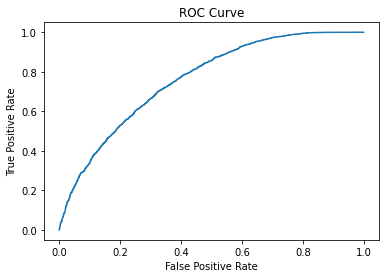

In [ ]:
plt.plot(fpr_lgb, tpr_lgb)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_val_train_lgb,validation_preds,average='macro')

0.7665477220586018

In [ ]:
probs_lgb_test = np.mean(preds_lgb_test,0)
probs_lgb_val = np.mean(preds_lgb_val,0)

In [ ]:
predictions_lgb_test = pd.DataFrame({'LoanNumber': df_test['LoanNumber'], 'Fund':y_test, 'prob': probs_lgb_test})
predictions_val = pd.DataFrame({'LoanNumber': test['LoanNumber'], 'prob_lgb': probs_lgb_val})

In [ ]:
# Sort on prediction (descending)
predictions_lgb_test = predictions_lgb_test.sort_values(by = 'prob',ascending=False)
predictions_lgb_test.head()

,LoanNumber,Fund,prob
7350,9735314198,1,0.943876
37036,9770451152,1,0.939646
36536,9722255883,1,0.936611
11780,9723213097,1,0.935394
2032,9743456544,1,0.926165


In [ ]:
# data_train = predictions_lgb_train.copy()
data_test = predictions_lgb_test.copy()
data_test.shape

(7695, 3)

In [ ]:
def get_gains(data,target_col):
    
    data['row_id'] = range(0,0+len(data))  # Add row ids
    data['decile'] = ( data['row_id'] / (len(data)/10) ).astype(int) # Add decile
    #data.head()
    
    # Check the count by decile
    data.loc[data['decile'] == 10]=9
    data['decile'].value_counts()
    
    #create gains table
    data['decile'] = data['decile']+1
    gains = data.groupby('decile')[target_col].agg(['count','sum']).reset_index()
    gains.columns = ['decile','count','actual_funds']
    gains
    
    #add metrics to the gains table
    gains['non_actual_funds'] = gains['count'] - gains['actual_funds']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual_funds'].cumsum()
    gains['cum_non_actual'] = gains['non_actual_funds'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual'] ) * 100
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains = pd.DataFrame(gains)
    return gains

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

# If,the lift in Decile 1 is 2.5 it means Decile 1 can get 2.5 times of more locks compared to random selection.

get_gains(data_test,'Fund')

,decile,count,actual_funds,non_actual_funds,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,K_S,lift
0,1,770,680,90,770,680,90,0.15,0.03,463.6,12.0,1.47
1,2,769,644,125,1539,1324,215,0.29,0.07,927.2,22.0,1.43
2,3,770,582,188,2309,1906,403,0.41,0.13,1390.8,28.0,1.37
3,4,769,553,216,3078,2459,619,0.53,0.20,1854.4,33.0,1.33
4,5,770,519,251,3848,2978,870,0.64,0.28,2318.0,36.0,1.28
5,6,769,492,277,4617,3470,1147,0.75,0.37,2781.6,38.0,1.25
6,7,770,449,321,5387,3919,1468,0.85,0.48,3245.2,37.0,1.21
7,8,769,394,375,6156,4313,1843,0.93,0.60,3708.8,33.0,1.16
8,9,770,269,501,6926,4582,2344,0.99,0.77,4172.4,22.0,1.10
9,10,769,54,715,7695,4636,3059,1.00,1.00,4636.0,0.0,1.00


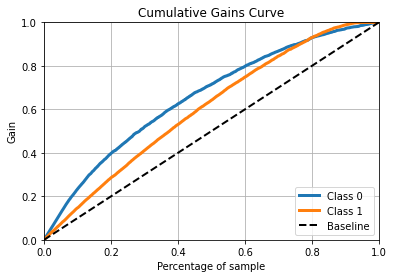

In [ ]:
import scikitplot as skplt
def gain_plot(y,probs):
    
    final_prob_df  = pd.DataFrame({'0': 1-probs,'1':probs})   
    skplt.metrics.plot_cumulative_gain(y,final_prob_df)
    plt.show()

gain_plot(y_test,probs_lgb_test)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

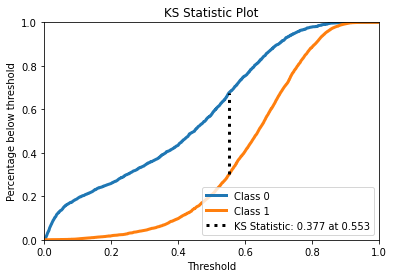

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

import scikitplot as skplt
final_prob_df_test  = pd.DataFrame({'0': 1-probs_lgb_test,'1':probs_lgb_test})
skplt.metrics.plot_ks_statistic(y_test, final_prob_df_test)

In [ ]:
## K-S Two Sample Test
# One sample have the prob scores corresponding to non-events and another sample corresponds to events.
from scipy.stats import ks_2samp
ks_2samp(final_prob_df_test['0'], final_prob_df_test['1'],mode='exact')

KstestResult(statistic=0.29434697855750486, pvalue=2.788359164378933e-294)

<AxesSubplot:xlabel='Fund', ylabel='prob'>

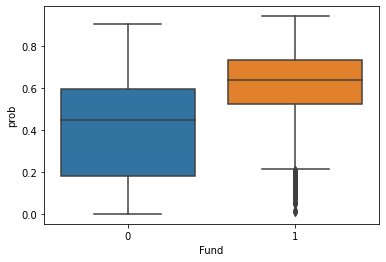

In [ ]:
import seaborn as sns
sns.boxplot(y = 'prob',x = 'Fund',data=predictions_lgb_test)

In [ ]:
predictions_lgb_test[predictions_lgb_test['Fund']==0]['prob'].mean(),predictions_lgb_test[predictions_lgb_test['Fund']==1]['prob'].mean()

(0.40214394655751423, 0.6183702495000832)

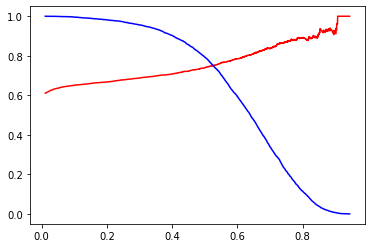

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_lgb, recall_lgb, thresholds_lgb = precision_recall_curve(predictions_lgb_test['Fund'], predictions_lgb_test.prob)

plt.plot(thresholds_lgb, precision_lgb[:-1], "r-")
plt.plot(thresholds_lgb, recall_lgb[:-1], "b-")
plt.show()

In [ ]:
predictions_lgb_test.head()

,LoanNumber,Fund,prob
7350,9735314198,1,0.943876
37036,9770451152,1,0.939646
36536,9722255883,1,0.936611
11780,9723213097,1,0.935394
2032,9743456544,1,0.926165


In [ ]:
y_pred_lgb = np.where(np.array(predictions_lgb_test.prob) > 0.5,1,0)

In [ ]:
print(pd.crosstab(predictions_lgb_test['Fund'],  y_pred_lgb, rownames=['Actual'], colnames=['Predicted']))

Predicted     0     1
Actual               
0          1763  1296
1           958  3678


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions_lgb_test['Fund'], y_pred_lgb))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61      3059
           1       0.74      0.79      0.77      4636

    accuracy                           0.71      7695
   macro avg       0.69      0.68      0.69      7695
weighted avg       0.70      0.71      0.70      7695



In [ ]:
# df1 = pd.read_csv('C:/CHL/portfolio_lock_fund_final_08_31.csv')

In [ ]:
# df[df['STUDt'].isnull() == True].shape

### XGBoost

In [ ]:
import xgboost as xgb
#def xgb_training(df, y, random_seed = 0):
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import roc_curve, auc
xgb_auc_score = []

preds_xgb = []
preds_val_xgb = []

xgbfold=StratifiedKFold(n_splits=10, random_state=random_seed, shuffle=True)

i = 1
print(f"Seed: {random_seed}")

for train_idx, val_idx in xgbfold.split(X_train, y_train):
    X_train_1, X_val_1 = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_1, y_val_1 = y_train.iloc[train_idx], y_train.iloc[val_idx]

    test_data = X_test.copy(deep=True)

    params = {
     "objective" : "binary:logistic",
     "eval_metric" : "auc",
     "max_depth" : 6,
     "eta" : 0.1,
     "subsample" : 0.8,
     "colsample_bytree" : 0.8,
     "min_child_weight" : 10,
     "max_bin" : 16,
     "seed" : random_seed
    }

    xgtrain = xgb.DMatrix(X_train_1, label=y_train_1)
    xgval = xgb.DMatrix(X_val_1, label=y_val_1)
    watchlist = [ (xgtrain,'train'), (xgval, 'valid') ]

    xgb_model = xgb.train(params
                          , xgtrain
                          , 3000
                          , watchlist
                          , early_stopping_rounds=100
                          , verbose_eval=100
                         )

    validation_preds_xgb = xgb_model.predict(xgval, ntree_limit=xgb_model.best_ntree_limit)

    fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()), columns=['col','imp'])
    fea_imp = fea_imp.sort_values('imp', ascending=False)
    print(f"\n{fea_imp.head(10)}")

    test_preds_xgb = xgb_model.predict(xgb.DMatrix(test_data), ntree_limit=xgb_model.best_ntree_limit)
    preds_xgb.append(test_preds_xgb)
    
    val_preds_xgb = xgb_model.predict(xgb.DMatrix(X_val), ntree_limit=xgb_model.best_ntree_limit)
    preds_val_xgb.append(val_preds_xgb)
    
    auc = round(roc_auc_score(y_val_1, validation_preds_xgb), 5)

    print(f"\nFold {i}, AUC Score: {auc}")

    xgb_auc_score.append(auc)

    i = i+1

    print('\nCross validated AUC: {}\n'.format(np.mean(xgb_auc_score)))

print(f'AUC Scores: {xgb_auc_score}\n')

#return(preds_xgb)

Seed: 12345
[0]	train-auc:0.71264	valid-auc:0.69096
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[100]	train-auc:0.83921	valid-auc:0.76232
[200]	train-auc:0.88395	valid-auc:0.76234
Stopping. Best iteration:
[140]	train-auc:0.86073	valid-auc:0.76404


                             col  imp
1                     FinalPrice  404
0                            DTI  399
21                  diff_in_loan  365
6                    diff_in_LTV  338
7             diff_val_waterfall  328
10                           LTV  308
3   BCalcBaseUPBFinalPriceAmount  303
28                      ltv_curr  289
33         diff_prevailing_rates  264
12                  diff_in_rate  236

Fold 1, AUC Score: 0.76404

Cross validated AUC: 0.76404

[0]	train-auc:0.71336	valid-auc:0.70144
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 1

In [ ]:
fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()), columns=['col','imp'])
fea_imp = fea_imp.sort_values('imp', ascending=False)
fea_imp.head(20)

,col,imp
20,diff_in_loan,544
1,FinalPrice,483
6,diff_in_LTV,457
0,DTI,447
7,diff_val_waterfall,428
9,LTV,404
18,ltv_curr,357
29,diff_prevailing_rates,354
5,BCalcUnderwritingTotalStableMonthlyIncome,332
3,BCalcBaseUPBFinalPriceAmount,311


In [ ]:
np.shape(preds_xgb)

(10, 7695)

In [ ]:
np.shape(preds_val_xgb)

(10, 3527)

In [ ]:
predictions_val['prob_xgb'] = np.mean(preds_val_xgb,0)
predictions_val.head()

,LoanNumber,prob_lgb,prob_xgb
0,9753293654,0.421275,0.406012
1,9797207454,0.473618,0.610995
2,9731214855,0.752133,0.794178
3,9715552072,0.546697,0.625354
4,9783648141,0.552191,0.644817


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, np.mean(preds_xgb,0))

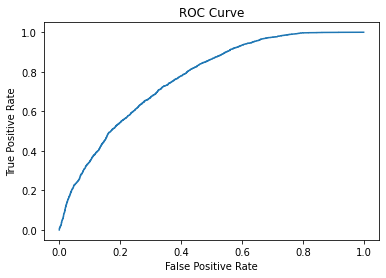

In [ ]:
plt.plot(fpr_xgb, tpr_xgb)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
np.shape(validation_preds_xgb)

(3077,)

In [ ]:
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test,np.mean(preds_xgb,0),average='macro')

0.7664698801059746

In [ ]:
probs_xgb_test = np.mean(preds_xgb,0)

In [ ]:
predictions_xgb_test = pd.DataFrame({'LoanNumber': df_test['LoanNumber'], 'Fund':y_test, 'prob': probs_xgb_test})

In [ ]:
# Sort on prediction (descending)
predictions_xgb_test = predictions_xgb_test.sort_values(by = 'prob',ascending=False)
predictions_xgb_test.head()

,LoanNumber,Fund,prob
2032,9743456544,1,0.951523
7350,9735314198,1,0.945635
36556,9708868964,1,0.941999
12454,9730474781,1,0.939345
36601,9750395080,1,0.938566


In [ ]:
data_test_xgb = predictions_xgb_test.copy()

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

# If,the lift in Decile 1 is 2.5 it means Decile 1 can get 2.5 times of more locks compared to random selection.

get_gains(data_test_xgb,'Fund')

,decile,count,actual_funds,non_actual_funds,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,K_S,lift
0,1,770,686,84,770,686,84,0.15,0.03,463.6,12.0,1.48
1,2,769,626,143,1539,1312,227,0.28,0.07,927.2,21.0,1.42
2,3,770,592,178,2309,1904,405,0.41,0.13,1390.8,28.0,1.37
3,4,769,580,189,3078,2484,594,0.54,0.19,1854.4,35.0,1.34
4,5,770,512,258,3848,2996,852,0.65,0.28,2318.0,37.0,1.29
5,6,769,487,282,4617,3483,1134,0.75,0.37,2781.6,38.0,1.25
6,7,770,446,324,5387,3929,1458,0.85,0.48,3245.2,37.0,1.21
7,8,769,398,371,6156,4327,1829,0.93,0.60,3708.8,33.0,1.17
8,9,770,264,506,6926,4591,2335,0.99,0.76,4172.4,23.0,1.10
9,10,769,45,724,7695,4636,3059,1.00,1.00,4636.0,0.0,1.00


In [ ]:
# Cost benefit analysis
# each decile benefit, savings
# response rate

In [ ]:
import scikitplot as skplt
def gain_plot(y,probs):
    
    final_prob_df  = pd.DataFrame({'0': 1-probs,'1':probs})   
    skplt.metrics.plot_cumulative_gain(y,final_prob_df)
    plt.show()

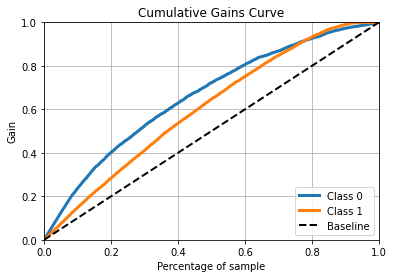

In [ ]:
gain_plot(y_test,probs_xgb_test)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

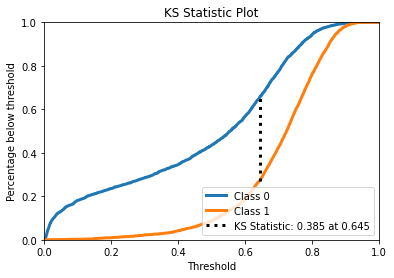

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

import scikitplot as skplt
final_prob_df_test_xgb  = pd.DataFrame({'0': 1-probs_xgb_test,'1':probs_xgb_test})
skplt.metrics.plot_ks_statistic(y_test, final_prob_df_test_xgb)

In [ ]:
## K-S Two Sample Test
# One sample have the prob scores corresponding to non-events and another sample corresponds to events.
from scipy.stats import ks_2samp
ks_2samp(final_prob_df_test_xgb['0'], final_prob_df_test_xgb['1'],mode='exact')

KstestResult(statistic=0.5519168291098115, pvalue=0.0)

<AxesSubplot:xlabel='Fund', ylabel='prob'>

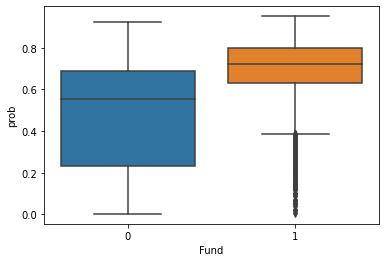

In [ ]:
import seaborn as sns
sns.boxplot(y = 'prob',x = 'Fund',data=predictions_xgb_test)

In [ ]:
predictions_xgb_test[predictions_xgb_test['Fund']==1]['prob'].mean(), predictions_xgb_test[predictions_xgb_test['Fund']==0]['prob'].mean()

(0.6984506, 0.46983278)

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(predictions_xgb_test.Fund, predictions_xgb_test.prob)

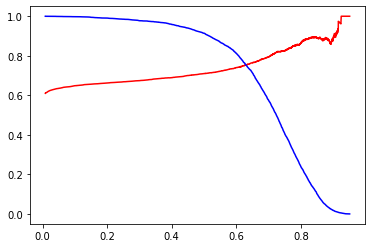

In [ ]:
plt.plot(thresholds_xgb, precision_xgb[:-1], "r-")
plt.plot(thresholds_xgb, recall_xgb[:-1], "b-")
plt.show()

In [ ]:
predictions_xgb_test.head()

,LoanNumber,Fund,prob
2032,9743456544,1,0.951523
7350,9735314198,1,0.945635
36556,9708868964,1,0.941999
12454,9730474781,1,0.939345
36601,9750395080,1,0.938566


In [ ]:
y_pred_xgb = np.where(np.array(predictions_xgb_test.prob) > 0.6,1,0)

In [ ]:
print(pd.crosstab(predictions_xgb_test.Fund,  y_pred_xgb, rownames=['Actual'], colnames=['Predicted']))

Predicted     0     1
Actual               
0          1740  1319
1           869  3767


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions_xgb_test.Fund, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.57      0.61      3059
           1       0.74      0.81      0.77      4636

    accuracy                           0.72      7695
   macro avg       0.70      0.69      0.69      7695
weighted avg       0.71      0.72      0.71      7695



### catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
random_seed = 12345

preds_cb = []
preds_val_cb = []
preds_train_cb = []
cb_auc_score =[]

cbfold=StratifiedKFold(n_splits=10, random_state=random_seed, shuffle=True)
i = 1
print(f"Seed: {random_seed}")
for train_idx, val_idx in cbfold.split(X_train, y_train):
    X_train_2, X_val_2 = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_2, y_val_2 = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # training the model on oversampled 5 folds of training set
    cb = CatBoostClassifier(n_estimators=3000,
                             verbose = 250,
                             eval_metric='AUC',
                             depth = 6,
                             learning_rate = 0.1,
                             od_type = "Iter",
                             od_wait = 100,
                             rsm=0.8,
                             random_state=random_seed
                            )

    cb.fit(X_train_2, y_train_2, eval_set=[(X_val_2, y_val_2)])
    
    # testing on 1 fold of validation set
    validation_preds_cb = cb.predict_proba(X_val_2)

    fea_imp = pd.DataFrame({'col': X_train_2.columns, 'imp': cb.feature_importances_})
    fea_imp = fea_imp.sort_values('imp', ascending=False)
    print(fea_imp.head(10))


    test_preds_cb = cb.predict_proba(X_test)
    preds_cb.append(test_preds_cb[:,1])
    
    val_preds_cb = cb.predict_proba(X_val)
    preds_val_cb.append(val_preds_cb[:,1])
    
    train_preds_cb = cb.predict_proba(X_train)
    preds_train_cb.append(train_preds_cb[:,1])
    
    auc_score = round(roc_auc_score(y_val_2, validation_preds_cb[:,1]), 5)

    print(f"\nFold {i}, AUC Score: {auc_score}")
        
    cb_auc_score.append(auc_score)


    i = i+1
    
    print('\nCross validated AUC: {}\n'.format(np.mean(cb_auc_score)))
        
    print(f'AUC Scores: {cb_auc_score}\n')

Seed: 12345
0:	test: 0.6736065	best: 0.6736065 (0)	total: 85.4ms	remaining: 4m 16s
250:	test: 0.7624660	best: 0.7626801 (242)	total: 3.84s	remaining: 42s
500:	test: 0.7669013	best: 0.7669471 (498)	total: 7.84s	remaining: 39.1s
750:	test: 0.7695320	best: 0.7702988 (741)	total: 12.4s	remaining: 37.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7702988063
bestIteration = 741

Shrink model to first 742 iterations.
                                          col        imp
8                                         DTI  14.976592
14                                 FinalPrice   8.747795
43                               diff_in_loan   4.823943
19               BCalcBaseUPBFinalPriceAmount   4.438640
42                                diff_in_LTV   3.792271
45                         diff_val_waterfall   3.767398
5                                        FICO   3.672086
6                                         LTV   3.545986
18  BCalcUnderwritingTotalStableMonthlyIncome   

In [ ]:
fea_imp = pd.DataFrame({'col': X_train_2.columns, 'imp': cb.feature_importances_})
fea_imp = fea_imp.sort_values('imp', ascending=False)
pd.DataFrame(fea_imp).head(20)

,col,imp
8,DTI,20.217862
14,FinalPrice,9.245248
19,BCalcBaseUPBFinalPriceAmount,5.080082
43,diff_in_loan,4.037831
1,ProductGroup,3.824048
5,FICO,3.671540
18,BCalcUnderwritingTotalStableMonthlyIncome,3.374817
42,diff_in_LTV,3.366371
41,diff_in_rate,3.326120
7,Rate,3.227898


In [ ]:
cb_auc_score

[0.7703,
 0.76257,
 0.77192,
 0.7653,
 0.77177,
 0.77997,
 0.77207,
 0.76922,
 0.77118,
 0.79158]

In [ ]:
np.mean(cb_auc_score)

0.772588

In [ ]:
np.shape(preds_cb)

(10, 7695)

In [ ]:
np.shape(preds_train_cb)

(10, 30777)

In [ ]:
predictions_val['probs_cb'] = np.mean(preds_val_cb,0)
predictions_val.head()

,LoanNumber,prob_lgb,prob_xgb,probs_cb
0,9753293654,0.421275,0.406012,0.568210
1,9797207454,0.473618,0.610995,0.615162
2,9731214855,0.752133,0.794178,0.770431
3,9715552072,0.546697,0.625354,0.582998
4,9783648141,0.552191,0.644817,0.660043


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_cb, tpr_cb, thresholds_cb = roc_curve(y_test, np.mean(preds_cb,0))

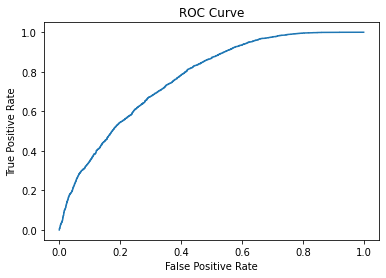

In [ ]:
plt.plot(fpr_cb, tpr_cb)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test, np.mean(preds_cb,0),average='macro')

0.7679963027951016

In [ ]:
probs_cb_test = np.mean(preds_cb,0)

In [ ]:
probs_cb_train = np.mean(preds_train_cb,0)

In [ ]:
predictions_cb_test = pd.DataFrame({'LoanNumber': df_test['LoanNumber'], 'Fund':y_test, 'prob': probs_cb_test})
predictions_cb_train = pd.DataFrame({'LoanNumber': df_train['LoanNumber'], 'Fund':y_train, 'prob': probs_cb_train})

In [ ]:
print(predictions_cb_train.shape)
print(predictions_cb_test.shape)

(30777, 3)
(7695, 3)


In [ ]:
predictions = pd.concat([predictions_cb_train,predictions_cb_test])
predictions.shape

(38472, 3)

In [ ]:
stu_df['STU_Flag'] = np.where(stu_df['STUDt'].isnull() ==  True, 0, 1)
stu_df.drop('STUDt',axis=1,inplace=True)
stu_df.head()

,LoanNumber,STU_Flag
0,9778156191,1
1,9752717661,1
2,9777231680,1
3,9705101740,1
4,9772864451,1


In [ ]:
stu_df.shape

(38472, 2)

In [ ]:
predictions_cb_test = pd.merge(predictions_cb_test,stu_df,on='LoanNumber',how='left')
predictions = pd.merge(predictions,stu_df,on='LoanNumber',how='left')

In [ ]:
# Sort on prediction (descending)
predictions_cb_test = predictions_cb_test.sort_values(by = 'prob',ascending=False)
predictions_cb_test.head()

,LoanNumber,Fund,prob,STU_Flag
207,9722255883,1,0.960876,1
1478,9743456544,1,0.953950,1
5688,9732426862,1,0.952584,1
4447,9730474781,1,0.952338,1
3137,9770451152,1,0.951190,1


In [ ]:
predictions = predictions.sort_values(by='prob',ascending=False)
predictions.head()

,LoanNumber,Fund,prob,STU_Flag
23844,9783746572,1,0.967923,1
22187,9794356643,1,0.963930,1
6418,9719577448,1,0.962769,1
7766,9785267445,1,0.960945,1
30984,9722255883,1,0.960876,1


In [ ]:
data_test_cb = predictions_cb_test.copy()
data_full = predictions.copy()

In [ ]:
def get_gains(data,target_col):
    
    data['row_id'] = range(0,0+len(data))  # Add row ids
    data['decile'] = ( data['row_id'] / (len(data)/10) ).astype(int) # Add decile
    #data.head()
    
    # Check the count by decile
    data.loc[data['decile'] == 10]=9
    data['decile'].value_counts()
    
    #create gains table
    data['decile'] = data['decile']+1
    gains = data.groupby('decile')[target_col,'STU_Flag'].agg(['count','sum']).reset_index()
    gains.columns = ['decile','count','actual_funds','count_STU','STU']
    gains.drop('count_STU',axis=1,inplace=True)
    gains['%STU'] = (gains['STU']/gains['count']).round(2)
    gains['%actual_funds'] = (gains['actual_funds']/gains['count']).round(2)
    
    #add metrics to the gains table
    gains['non_actual_funds'] = gains['count'] - gains['actual_funds']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual_funds'].cumsum()
    gains['cum_non_actual'] = gains['non_actual_funds'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual'] ) * 100
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains = pd.DataFrame(gains)
    gains = gains[['decile', 'count', 'actual_funds', '%actual_funds','STU', '%STU', 'non_actual_funds',
       'cum_count', 'cum_actual', 'cum_non_actual', 'percent_cum_actual',
       'percent_cum_non_actual', 'if_random', 'K_S', 'lift']]
    return gains

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

# If,the lift in Decile 1 is 2.5 it means Decile 1 can get 2.5 times of more locks compared to random selection.

get_gains(data_test_cb,'Fund')

,decile,count,actual_funds,%actual_funds,STU,%STU,non_actual_funds,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,K_S,lift
0,1,770,688,0.89,733,0.95,82,770,688,82,0.15,0.03,463.6,12.0,1.48
1,2,769,644,0.84,720,0.94,125,1539,1332,207,0.29,0.07,927.2,22.0,1.44
2,3,770,579,0.75,683,0.89,191,2309,1911,398,0.41,0.13,1390.8,28.0,1.37
3,4,769,573,0.75,679,0.88,196,3078,2484,594,0.54,0.19,1854.4,35.0,1.34
4,5,770,507,0.66,641,0.83,263,3848,2991,857,0.65,0.28,2318.0,37.0,1.29
5,6,769,488,0.63,631,0.82,281,4617,3479,1138,0.75,0.37,2781.6,38.0,1.25
6,7,770,462,0.60,602,0.78,308,5387,3941,1446,0.85,0.47,3245.2,38.0,1.21
7,8,769,389,0.51,582,0.76,380,6156,4330,1826,0.93,0.60,3708.8,33.0,1.17
8,9,770,260,0.34,502,0.65,510,6926,4590,2336,0.99,0.76,4172.4,23.0,1.10
9,10,769,46,0.06,310,0.40,723,7695,4636,3059,1.00,1.00,4636.0,0.0,1.00


In [ ]:
['decile', 'count', 'actual_funds', 'STU', '%STU', 'non_actual_funds',
       'cum_count', 'cum_actual', 'cum_non_actual', 'percent_cum_actual',
       'percent_cum_non_actual', 'if_random', 'K_S', 'lift']

In [ ]:
get_gains(data_full,'Fund')

,decile,count,actual_funds,STU,%STU,non_actual_funds,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,K_S,lift
0,1,3848,3644,3767,0.98,204,3848,3644,204,0.16,0.01,2317.8,15.0,1.57
1,2,3847,3481,3699,0.96,366,7695,7125,570,0.31,0.04,4635.6,27.0,1.54
2,3,3847,3217,3567,0.93,630,11542,10342,1200,0.45,0.08,6953.4,37.0,1.49
3,4,3847,3029,3444,0.90,818,15389,13371,2018,0.58,0.13,9271.2,45.0,1.44
4,5,3847,2762,3298,0.86,1085,19236,16133,3103,0.70,0.20,11589.0,50.0,1.39
5,6,3848,2491,3140,0.82,1357,23084,18624,4460,0.80,0.29,13906.8,51.0,1.34
6,7,3847,2187,2963,0.77,1660,26931,20811,6120,0.90,0.40,16224.6,50.0,1.28
7,8,3847,1611,2716,0.71,2236,30778,22422,8356,0.97,0.55,18542.4,42.0,1.21
8,9,3847,699,2155,0.56,3148,34625,23121,11504,1.00,0.75,20860.2,25.0,1.11
9,10,3847,57,1476,0.38,3790,38472,23178,15294,1.00,1.00,23178.0,0.0,1.00


In [ ]:
# Cost benefit analysis
# each decile benefit, savings
# response rate

In [ ]:
import scikitplot as skplt
def gain_plot(y,probs):
    
    final_prob_df  = pd.DataFrame({'0': 1-probs,'1':probs})   
    skplt.metrics.plot_cumulative_gain(y,final_prob_df)
    plt.show()

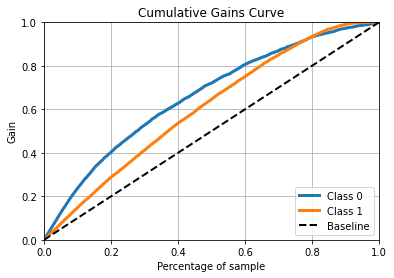

In [ ]:
gain_plot(y_test,probs_cb_test)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

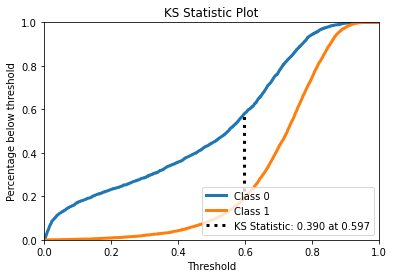

In [ ]:
# K-S measures the degree of separation between the distributions of the positive and negative responders. 
# If a model cannot separate positive from negative cases, the K-S for all deciles will be 0. 

import scikitplot as skplt
final_prob_df_test_cb  = pd.DataFrame({'0': 1-probs_cb_test,'1':probs_cb_test})
skplt.metrics.plot_ks_statistic(y_test, final_prob_df_test_cb)

In [ ]:
## K-S Two Sample Test
# One sample have the prob scores corresponding to non-events and another sample corresponds to events.
from scipy.stats import ks_2samp
ks_2samp(final_prob_df_test_cb['0'], final_prob_df_test_cb['1'],mode='exact')

KstestResult(statistic=0.5398310591293047, pvalue=0.0)

<AxesSubplot:xlabel='Fund', ylabel='prob'>

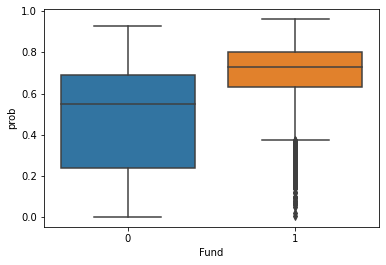

In [ ]:
import seaborn as sns
sns.boxplot(y = 'prob',x = 'Fund',data=predictions_cb_test)

In [ ]:
predictions_cb_test[predictions_cb_test['Fund']==1]['prob'].mean(), predictions_cb_test[predictions_cb_test['Fund']==0]['prob'].mean()

(0.6999122914698752, 0.4692984598089011)

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_cb, recall_cb, thresholds_cb = precision_recall_curve(predictions_cb_test.Fund, predictions_cb_test.prob)

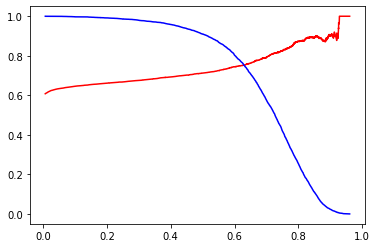

In [ ]:
plt.plot(thresholds_cb, precision_cb[:-1], "r-")
plt.plot(thresholds_cb, recall_cb[:-1], "b-")
plt.show()

In [ ]:
predictions_cb_test.head()

,LoanNumber,Fund,prob,STU_Flag
207,9722255883,1,0.960876,1
1478,9743456544,1,0.953950,1
5688,9732426862,1,0.952584,1
4447,9730474781,1,0.952338,1
3137,9770451152,1,0.951190,1


In [ ]:
y_pred_cb = np.where(np.array(predictions_cb_test.prob) > 0.6,1,0)

In [ ]:
print(pd.crosstab(predictions_cb_test.Fund,  y_pred_cb, rownames=['Actual'], colnames=['Predicted']))

Predicted     0     1
Actual               
0          1780  1279
1           915  3721


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions_cb_test.Fund, y_pred_cb))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      3059
           1       0.74      0.80      0.77      4636

    accuracy                           0.71      7695
   macro avg       0.70      0.69      0.70      7695
weighted avg       0.71      0.71      0.71      7695



#### shap values

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(cb)

In [ ]:
shap_values_train = explainer.shap_values(X_train_2)

In [ ]:
shap_values_test = explainer.shap_values(X_val_2)

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'blue','red')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = False)
    colorlist = k2['Sign']
    #return k2
    k2 = k2.head(20)
    #return k2
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,10),legend=False)
    ax.invert_yaxis()
    ax.set_xlabel("SHAP Value (Blue = Positive Impact)")
 

In [ ]:
shap_values_test.shape

(3077, 47)

In [ ]:
# ABS_SHAP(shap_values_test, X_test_2)

In [ ]:
# shap.summary_plot(shap_values_test, df_test_cb, plot_size=(15, 10))

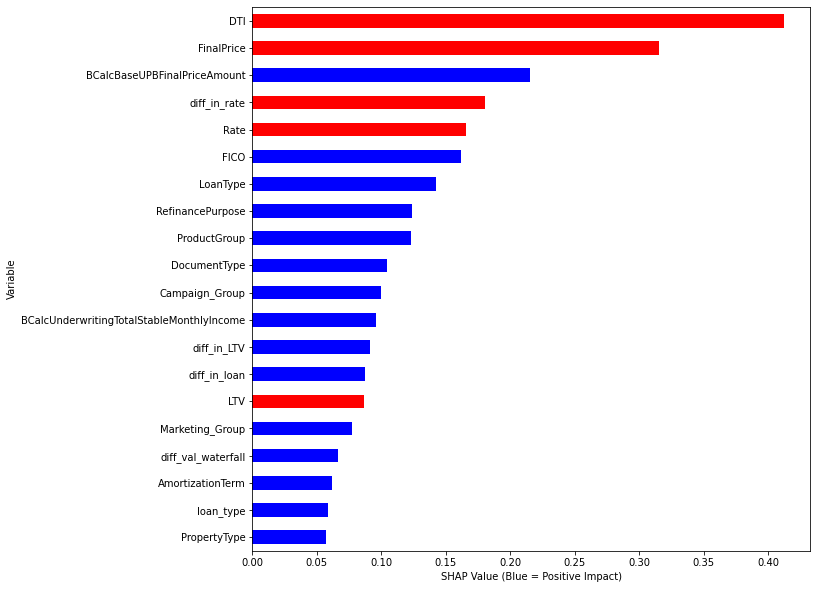

In [ ]:
ABS_SHAP(shap_values_train, X_train_2)

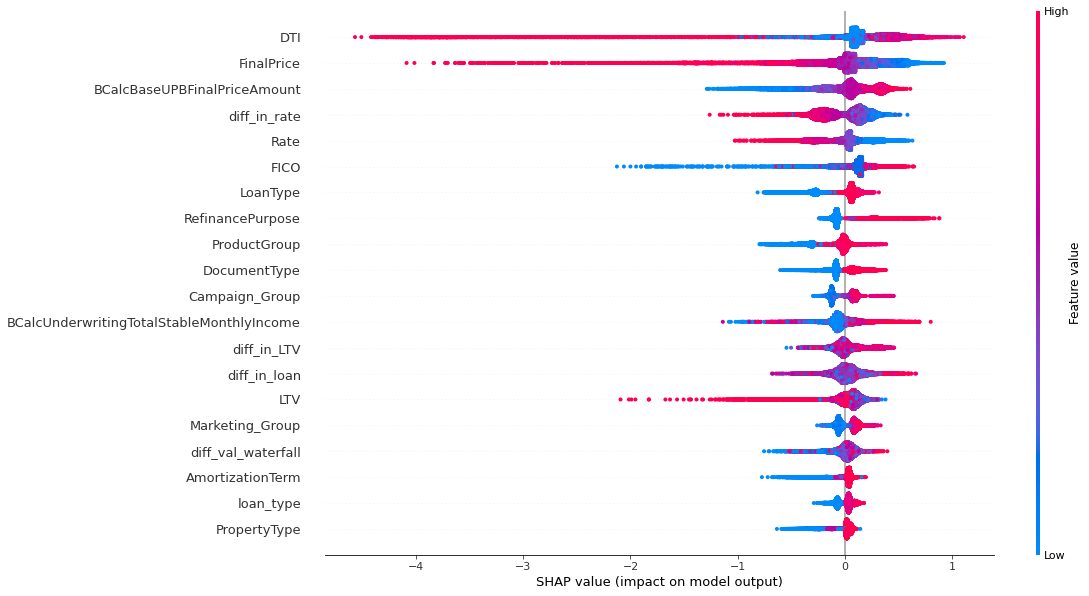

In [ ]:
shap.summary_plot(shap_values_train, X_train_2,plot_size=(15, 10))

### col_info

In [ ]:
df.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,Fund,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
0,9778156191,206043.0,FHA,FHA,FULL,360.0,605.0,67.500,4.05,40.832,PRIMARY RESIDENCE,DETACHED,1,C/O: DEBT CONSOL,TRUE,0.575,False,FALSE,57280.0,6250.0,-1184.7472,UNKNOWN,165938.0,146287.46,4.750,4.750,96.50,63.013845,232151.30,UNKNOWN,0-29,FIXED,865.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,169000.0,OTHER,OTHER,0,5+,False,-0.700,-29.000,40105.0,305248.888889,73097.588889,-1.710
1,9752717661,199000.0,CONVENTIONAL,CONVENTIONAL,FULL,360.0,790.0,30.616,2.90,69.234,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,1426.0,1794.6,0.0000,CREDIT TRIGGER,240000.0,194752.51,4.500,4.500,53.33,32.213605,604566.02,UNKNOWN,0-29,FIXED,1216.04,FULL DOC,CONV,OWNER OCCUPIED,360.0,450000.0,CREDIT TRIGGERS,TRIGGERS / SIGNALS,0,5+,True,-1.600,-22.714,-41000.0,649986.934936,45420.914936,-1.620
2,9777231680,126254.0,FHA,FHA,STREAMLINE,360.0,680.0,90.572,2.75,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,-0.447,False,FALSE,0.0,0.0,564.3554,SERVICING XFER,134518.0,123319.63,4.625,4.625,96.50,80.277709,153616.28,UNKNOWN,0-29,FIXED,691.61,FULL DOC,FHA,OWNER OCCUPIED,360.0,140000.0,SERVICING XFER,SERVICING,0,3-5 YRS,False,-1.875,-5.928,-8264.0,139396.281411,-14219.998589,-0.490
3,9705101740,87000.0,CONVENTIONAL,CONVENTIONAL,FULL,240.0,741.0,54.375,3.25,41.309,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,0.000,False,FALSE,19345.0,4016.2,0.0000,MONTHLY BENEFIT MKTG,100000.0,86022.89,4.375,4.375,68.97,51.198079,168019.76,UNKNOWN,0-29,FIXED,499.29,FULL DOC,CONV,OWNER OCCUPIED,360.0,145000.0,BENEFIT,DM MARKETING,0,5+,True,-1.125,-14.595,-13000.0,160000.000000,-8019.760000,-1.505
4,9772864451,93967.0,VA,VA,STREAMLINE,360.0,680.0,100.972,2.25,0.000,PRIMARY RESIDENCE,DETACHED,1,NO C/O: RATE/TERM,TRUE,2.989,False,TRUE,0.0,0.0,-2808.6736,SERVICING XFER,92600.0,90924.59,2.750,2.750,102.50,101.148701,89892.00,REFI RATE TERM,0-29,FIXED,378.03,STREAMLINED,VA,OWNER OCCUPIED,360.0,89892.0,SERVICING XFER,SERVICING,0,< 1,False,-0.500,-1.528,1367.0,93062.433150,3170.433150,0.070


In [ ]:
df.shape

(38472, 49)

In [ ]:
col_info = df.head(1).transpose()
col_info.columns = ['Sample']
col_info

,Sample
LoanNumber,9778156191
LoanAmt,206043
ProductGroup,FHA
LoanType,FHA
DocumentType,FULL
AmortizationTerm,360
FICO,605
LTV,67.5
Rate,4.05
DTI,40.832


In [ ]:
col_info.to_excel('col_port_lock_fund.xlsx')

### pipeline results

In [ ]:
predictions_val.head()

,LoanNumber,prob_lgb,prob_xgb,probs_cb
0,9753293654,0.421275,0.406012,0.568210
1,9797207454,0.473618,0.610995,0.615162
2,9731214855,0.752133,0.794178,0.770431
3,9715552072,0.546697,0.625354,0.582998
4,9783648141,0.552191,0.644817,0.660043


In [ ]:
predictions_val[['prob_lgb','prob_xgb','probs_cb']].describe()

,prob_lgb,prob_xgb,probs_cb
count,3527.000000,3527.000000,3527.000000
mean,0.473397,0.550890,0.548284
std,0.206743,0.218436,0.219158
min,0.002424,0.004609,0.001340
25%,0.340998,0.432886,0.422308
50%,0.498350,0.601390,0.593820
75%,0.629191,0.715402,0.712217
max,0.925423,0.960391,0.954202


In [ ]:
test.head()

,LoanNumber,LoanAmt,ProductGroup,LoanType,DocumentType,AmortizationTerm,FICO,LTV,Rate,DTI,ResidencyType,PropertyType,NumberOfUnits,RefinancePurpose,FTHBFlag,FinalPrice,NewConstructionFlag,BW1IsAVeteran,BCalcTotalLiabilities,BCalcUnderwritingTotalStableMonthlyIncome,BCalcBaseUPBFinalPriceAmount,AttributedCampaignCategory,bal_orig,bal_prin,int_rate_orig,int_rate_curr,ltv_orig,ltv_curr,Val_waterfall,loan_purpose,delq_status_mba,product_type_curr,CurrentPIPmt,doc_type,loan_type,occ_type_orig,term_orig,val_appraisal_orig,Campaign_Group,Marketing_Group,orig_years,change_in_loan_type,diff_in_rate,diff_in_LTV,diff_in_loan,val_waterfall_present,diff_val_waterfall,diff_prevailing_rates
0,9753293654,321530.0,53.410819,53.458185,61.857461,360,581.0,80.000,3.25,49.568,60.553451,60.977385,1,62.525533,59.627587,0.000,60.235917,59.583949,120293.0,9538.01,0.0000,57.867588,278557.0,274534.28,2.750,2.750,96.06,96.327818,285000.00,62.701004,60.491265,60.278468,1137.18,60.573645,55.384358,60.545974,360.0,285000.0,63.525646,63.525646,63.285104,58.137336,0.500,-16.060,42973.0,401912.500000,116912.500000,0.47
1,9797207454,228900.0,63.221475,63.176291,61.857461,360,672.0,69.787,3.20,43.552,60.553451,60.977385,1,59.440054,61.012586,1.871,60.235917,59.583949,14250.0,4160.00,-4282.7190,57.867588,228759.0,221058.42,4.125,4.125,97.75,91.789300,240832.45,62.701004,60.491265,60.278468,1108.68,60.186950,55.384358,60.545974,360.0,230000.0,57.158397,57.126329,60.295302,62.525953,-0.925,-27.963,141.0,327998.051213,87165.601213,-0.35
2,9731214855,326200.0,61.949860,61.969705,61.857461,360,743.0,74.137,2.95,30.724,60.553451,60.977385,1,62.525533,59.627587,0.125,60.235917,61.817893,28331.0,8752.57,-407.7500,61.711684,300000.0,281537.22,4.000,4.000,95.24,82.858467,339780.87,59.681811,60.491265,60.278468,1432.25,60.186950,62.125337,60.545974,360.0,315000.0,63.845972,63.348178,58.361064,58.137336,-1.050,-21.103,26200.0,439996.223208,100215.353208,-1.28
3,9715552072,254103.0,53.410819,53.458185,58.585097,360,680.0,94.717,3.45,0.000,60.553451,60.977385,1,59.440054,61.012586,-3.258,60.235917,59.583949,0.0,0.00,8278.6757,57.867588,258888.0,249204.76,4.625,4.250,96.50,86.802581,287093.72,59.681811,60.491265,60.278468,1302.93,60.186950,55.384358,60.545974,360.0,265000.0,57.158397,57.126329,58.361064,58.137336,-0.800,-1.783,-4785.0,268276.022256,-18817.697744,-0.77
4,9783648141,136000.0,63.221475,63.176291,61.857461,180,751.0,34.000,2.75,44.327,60.553451,58.865935,1,62.119466,61.012586,2.284,60.235917,59.583949,74187.0,7269.60,-3106.2400,64.895284,139650.0,114174.16,4.000,4.000,95.00,36.830374,310000.00,59.681811,60.491265,60.278468,666.71,60.186950,64.221384,60.545974,360.0,148000.0,63.845972,65.346691,59.824167,62.525953,-1.250,-61.000,-3650.0,400000.000000,90000.000000,-0.83


In [ ]:
test.shape

(3527, 48)

In [ ]:
test['LoanNumber'].nunique()

3527

In [ ]:
pipeline_preds = pd.merge(test,predictions_val,how='left',on='LoanNumber')
pipeline_preds.shape

(3527, 51)

In [ ]:
predictions_val.to_csv('port_pipeline_preds.csv',index=False)